<a href="https://colab.research.google.com/github/selinbilginay/DataScience/blob/main/A_05_DataExplorationUnivariateAnalysis_en_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings 
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [110]:
education_stats=pd.read_csv('/content/states_all.csv')
education_stats.info()
education_stats.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

(1715, 25)

In [111]:
education_stats=education_stats.loc[education_stats["STATE"]!="NATIONAL"]
education_stats=education_stats.loc[education_stats["STATE"]!="DODEA"]
deleting_year=[1986,1987,1988,1989,1989,1990,1991,2017,2019]
for year in deleting_year:
  education_stats=education_stats.loc[education_stats["YEAR"]!=year] 

In [21]:
for state in education_stats.STATE.unique():
    print(state)
    print(education_stats[education_stats['STATE']==state].isnull().sum()*100/education_stats[education_stats['STATE']==state].shape[0])

ALABAMA
PRIMARY_KEY                      0.0
STATE                            0.0
YEAR                             0.0
ENROLL                           4.0
TOTAL_REVENUE                    0.0
FEDERAL_REVENUE                  0.0
STATE_REVENUE                    0.0
LOCAL_REVENUE                    0.0
TOTAL_EXPENDITURE                0.0
INSTRUCTION_EXPENDITURE          0.0
SUPPORT_SERVICES_EXPENDITURE     0.0
OTHER_EXPENDITURE                4.0
CAPITAL_OUTLAY_EXPENDITURE       0.0
GRADES_PK_G                      0.0
GRADES_KG_G                      0.0
GRADES_4_G                       0.0
GRADES_8_G                       0.0
GRADES_12_G                      0.0
GRADES_1_8_G                    20.0
GRADES_9_12_G                   20.0
GRADES_ALL_G                     0.0
AVG_MATH_4_SCORE                64.0
AVG_MATH_8_SCORE                64.0
AVG_READING_4_SCORE             56.0
AVG_READING_8_SCORE             64.0
dtype: float64
ALASKA
PRIMARY_KEY                      0.0
STATE   

In [112]:
education_stats.drop(['PRIMARY_KEY'],axis=1,inplace=True)

In [113]:
for state in education_stats.STATE.unique():
  display(education_stats[education_stats['STATE']==state])
  print(education_stats[education_stats['STATE']==state].shape)

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
51,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0,8264.0,56598.0,57497.0,60004.0,39900.0,NaN,NaN,734288.0,NaN,NaN,NaN,NaN
102,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,826442.0,306977.0,231508.0,9051.0,57723.0,56773.0,59165.0,41730.0,NaN,NaN,736531.0,NaN,NaN,208.0,NaN
153,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,888983.0,326956.0,243365.0,9324.0,59739.0,56486.0,59914.0,40981.0,NaN,NaN,746149.0,NaN,NaN,NaN,NaN
204,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,NaN,NaN,747932.0,NaN,NaN,NaN,NaN
255,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,1075352.0,323955.0,420070.0,9886.0,58326.0,57431.0,58210.0,44272.0,472847.0,208148.0,749207.0,NaN,NaN,NaN,NaN
306,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,1155492.0,357731.0,458351.0,10341.0,58055.0,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0
357,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,1208081.0,441314.0,515798.0,10548.0,56120.0,60012.0,56201.0,42576.0,472019.0,202045.0,740732.0,NaN,NaN,NaN,NaN
408,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,395909.0,663903.0,10836.0,55112.0,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.0,264.0,NaN,NaN
459,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,1374265.0,426481.0,540284.0,11841.0,54148.0,58929.0,56591.0,42909.0,469591.0,201610.0,737190.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
52,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,433788.0,36291.0,135791.0,2787.0,10329.0,10156.0,9160.0,6975.0,NaN,NaN,125948.0,NaN,NaN,NaN,NaN
103,ALASKA,1994,123868.0,1052282.0,134168.0,668229.0,249885.0,1116160.0,516242.0,446458.0,36589.0,98486.0,2593.0,10309.0,10318.0,9503.0,7057.0,NaN,NaN,127057.0,NaN,NaN,NaN,NaN
154,ALASKA,1995,125421.0,1117068.0,123037.0,710028.0,284003.0,1203817.0,515914.0,469085.0,37579.0,159146.0,2419.0,10567.0,10222.0,9573.0,7111.0,NaN,NaN,127618.0,NaN,NaN,NaN,NaN
205,ALASKA,1996,126189.0,1120346.0,123505.0,706116.0,290725.0,1240031.0,636959.0,365085.0,38996.0,179297.0,2186.0,10451.0,10055.0,9627.0,7370.0,NaN,NaN,129919.0,NaN,NaN,NaN,NaN
256,ALASKA,1997,128143.0,1131950.0,145563.0,692364.0,294023.0,1237103.0,651935.0,372788.0,40973.0,152330.0,2183.0,10249.0,10473.0,9954.0,7771.0,83217.0,36474.0,132123.0,NaN,NaN,NaN,NaN
307,ALASKA,1998,130633.0,1206195.0,157335.0,745814.0,303046.0,1222893.0,680848.0,376448.0,42456.0,104903.0,2017.0,9838.0,10555.0,10497.0,8403.0,85124.0,38394.0,135373.0,NaN,NaN,NaN,NaN
358,ALASKA,1999,133508.0,1243227.0,187153.0,740163.0,315911.0,1289988.0,705069.0,403903.0,42897.0,119079.0,1344.0,9583.0,10926.0,10575.0,8381.0,84674.0,38790.0,134391.0,NaN,NaN,NaN,NaN
409,ALASKA,2000,132822.0,1313510.0,199520.0,774194.0,339796.0,1386904.0,717725.0,417637.0,46782.0,184546.0,1210.0,9677.0,10646.0,10377.0,8335.0,83555.0,38914.0,133356.0,NaN,NaN,NaN,NaN
460,ALASKA,2001,131985.0,1325498.0,229297.0,732985.0,363216.0,1402839.0,701053.0,479510.0,48312.0,150279.0,1253.0,10095.0,10718.0,10702.0,8340.0,83540.0,39461.0,134358.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
2,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
53,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,1000914.0,164083.0,680139.0,3164.0,57656.0,57701.0,53500.0,37614.0,NaN,NaN,709453.0,NaN,NaN,NaN,NaN
104,ARIZONA,1994,708482.0,3566586.0,348847.0,1478372.0,1739367.0,3803379.0,1652311.0,1054136.0,183778.0,696618.0,3540.0,59545.0,60032.0,55334.0,40119.0,NaN,NaN,737424.0,NaN,NaN,206.0,NaN
155,ARIZONA,1995,735018.0,3815218.0,376437.0,1669173.0,1769608.0,4056279.0,1772388.0,1131046.0,226507.0,710135.0,4027.0,61420.0,60202.0,56407.0,39197.0,NaN,NaN,743566.0,NaN,NaN,NaN,NaN
206,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,4495.0,64613.0,62793.0,60514.0,42041.0,NaN,NaN,799250.0,NaN,NaN,NaN,NaN
257,ARIZONA,1997,783552.0,4343262.0,405291.0,1907516.0,2030455.0,4432360.0,1977550.0,1252277.0,265183.0,678793.0,4674.0,63857.0,65170.0,60138.0,44259.0,522450.0,217764.0,814113.0,NaN,NaN,NaN,NaN
308,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,1315931.0,279785.0,759108.0,5209.0,65312.0,67764.0,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0
359,ARIZONA,1999,814157.0,5085826.0,495708.0,2259753.0,2330365.0,5072471.0,2272859.0,1426620.0,264903.0,871345.0,1772.0,67051.0,70418.0,65338.0,47907.0,551623.0,228813.0,852612.0,NaN,NaN,NaN,NaN
410,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,1573568.0,270671.0,768425.0,2037.0,68347.0,72295.0,65526.0,49501.0,567626.0,236933.0,877696.0,219.0,269.0,NaN,NaN
461,ARIZONA,2001,834387.0,5916342.0,580043.0,2729793.0,2606506.0,5858385.0,2538936.0,1701945.0,269157.0,1035457.0,6624.0,72119.0,74270.0,69643.0,52162.0,585206.0,249920.0,922180.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
3,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
54,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,386526.0,68617.0,97824.0,1248.0,34337.0,34255.0,36471.0,27169.0,NaN,NaN,444271.0,NaN,NaN,NaN,NaN
105,ARKANSAS,1994,312695.0,1393287.0,132108.0,810396.0,450783.0,1445984.0,816270.0,403608.0,75434.0,105349.0,1652.0,35620.0,34488.0,36437.0,27161.0,NaN,NaN,447565.0,NaN,NaN,209.0,NaN
156,ARKANSAS,1995,447757.0,2057550.0,197556.0,1244457.0,615537.0,2155067.0,1211057.0,598109.0,119934.0,160693.0,1525.0,36731.0,33955.0,36696.0,27083.0,NaN,NaN,453257.0,NaN,NaN,NaN,NaN
207,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,1980.0,36442.0,33855.0,37064.0,27613.0,NaN,NaN,457349.0,NaN,NaN,NaN,NaN
258,ARKANSAS,1997,457349.0,2355859.0,218137.0,1387107.0,750615.0,2379496.0,1291727.0,667439.0,158337.0,192204.0,1672.0,35761.0,34067.0,36229.0,29204.0,282911.0,133449.0,456497.0,NaN,NaN,NaN,NaN
309,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,731619.0,170279.0,192590.0,1390.0,34120.0,35034.0,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0
360,ARKANSAS,1999,451981.0,2684966.0,232382.0,2001992.0,450592.0,2650808.0,1424443.0,767854.0,177666.0,196954.0,1425.0,34218.0,35707.0,35403.0,29316.0,281082.0,132893.0,451034.0,NaN,NaN,NaN,NaN
411,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,804253.0,138220.0,146666.0,2001.0,33941.0,35724.0,34873.0,28918.0,281091.0,131511.0,449959.0,216.0,257.0,NaN,NaN
462,ARKANSAS,2001,449693.0,2974588.0,274406.0,2135281.0,564901.0,2951677.0,1616883.0,877225.0,153300.0,235346.0,1623.0,34981.0,35216.0,35372.0,28849.0,280237.0,131418.0,449805.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
55,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,59954.0,444104.0,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN
106,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,6754346.0,1615630.0,1916061.0,66450.0,448237.0,426919.0,388561.0,285132.0,NaN,NaN,5407475.0,NaN,NaN,197.0,NaN
157,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,8603751.0,2181053.0,2669270.0,69182.0,472334.0,428553.0,399039.0,287428.0,NaN,NaN,5536406.0,NaN,NaN,NaN,NaN
208,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,NaN,NaN,5686198.0,NaN,NaN,NaN,NaN
259,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,10040400.0,1792979.0,3088674.0,76584.0,463684.0,451069.0,412604.0,317595.0,3591033.0,1578929.0,5803887.0,NaN,NaN,NaN,NaN
310,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,10939061.0,1862674.0,4335730.0,81926.0,459262.0,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0
361,CALIFORNIA,1999,5839207.0,41393435.0,3599923.0,23695095.0,14098417.0,40834643.0,21110543.0,11539910.0,1954362.0,4738866.0,85992.0,459771.0,489356.0,431730.0,347914.0,3734997.0,1675778.0,6038590.0,NaN,NaN,NaN,NaN
412,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,12429070.0,2269603.0,5849441.0,89919.0,459771.0,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.0,260.0,NaN,NaN
463,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,14127664.0,2570224.0,6755895.0,100351.0,457165.0,485301.0,461133.0,365907.0,3871843.0,1745295.0,6247726.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
5,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
56,COLORADO,1993,539538.0,3058326.0,147793.0,1242337.0,1668196.0,3028305.0,1537714.0,954032.0,92163.0,318959.0,7249.0,47598.0,50807.0,47665.0,34770.0,NaN,NaN,625062.0,NaN,NaN,NaN,NaN
107,COLORADO,1994,549570.0,3061865.0,165539.0,1269532.0,1626794.0,3113755.0,1574164.0,977343.0,95796.0,328219.0,9853.0,48673.0,51877.0,49332.0,35464.0,NaN,NaN,640521.0,NaN,NaN,213.0,NaN
158,COLORADO,1995,639805.0,3709875.0,201341.0,1577988.0,1930546.0,3766191.0,1896225.0,1174299.0,115636.0,449501.0,10472.0,50316.0,52783.0,51180.0,35480.0,NaN,NaN,656279.0,NaN,NaN,NaN,NaN
209,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,1127563.0,143767.0,588209.0,12520.0,50707.0,52524.0,52269.0,37179.0,NaN,NaN,673438.0,NaN,NaN,NaN,NaN
260,COLORADO,1997,672634.0,4133275.0,205038.0,1784304.0,2143933.0,4398196.0,2188731.0,1205308.0,154175.0,678631.0,12861.0,51408.0,53023.0,52632.0,39263.0,429624.0,192259.0,687167.0,NaN,NaN,NaN,NaN
311,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,1470619.0,158788.0,622534.0,13068.0,50859.0,54382.0,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0
362,COLORADO,1999,698402.0,4740254.0,234939.0,2004039.0,2501276.0,5040224.0,2401914.0,1565012.0,179582.0,628011.0,12857.0,50378.0,56154.0,54599.0,41999.0,442631.0,200982.0,708109.0,NaN,NaN,NaN,NaN
413,COLORADO,2000,707436.0,5073266.0,266207.0,2083318.0,2723741.0,5444193.0,2539372.0,1674044.0,191201.0,782711.0,15377.0,51039.0,57056.0,55384.0,43502.0,450150.0,207942.0,724508.0,NaN,NaN,NaN,NaN
464,COLORADO,2001,723696.0,5372784.0,292518.0,2222723.0,2857543.0,5727966.0,2709184.0,1844900.0,209212.0,672080.0,19516.0,53079.0,58028.0,56540.0,44912.0,456561.0,212989.0,742145.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
6,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
57,CONNECTICUT,1993,471918.0,4064158.0,149204.0,1433539.0,2481415.0,4079943.0,2302852.0,1190914.0,143312.0,186802.0,6216.0,42338.0,39093.0,34662.0,27979.0,NaN,NaN,496298.0,NaN,NaN,NaN,NaN
108,CONNECTICUT,1994,479522.0,4268860.0,142392.0,1537064.0,2589404.0,4132350.0,2431273.0,1221662.0,150749.0,53083.0,7601.0,43511.0,40737.0,35665.0,28640.0,NaN,NaN,506824.0,NaN,NaN,222.0,NaN
159,CONNECTICUT,1995,489513.0,4420632.0,147466.0,1622686.0,2650480.0,4252186.0,2596475.0,1245242.0,137005.0,91833.0,8093.0,44148.0,41365.0,37320.0,28282.0,NaN,NaN,517935.0,NaN,NaN,NaN,NaN
210,CONNECTICUT,1996,499815.0,4686025.0,162218.0,1703171.0,2820636.0,4538234.0,2701637.0,1296119.0,149792.0,149327.0,9147.0,43213.0,41969.0,37991.0,28882.0,NaN,NaN,527129.0,NaN,NaN,NaN,NaN
261,CONNECTICUT,1997,507838.0,4788489.0,158453.0,1719703.0,2910333.0,4642835.0,2709106.0,1368262.0,164857.0,194220.0,9680.0,42382.0,43175.0,39089.0,29660.0,340533.0,140872.0,535164.0,NaN,NaN,NaN,NaN
312,CONNECTICUT,1998,515141.0,5024673.0,189689.0,1828216.0,3006768.0,4810851.0,2844608.0,1444460.0,162325.0,144785.0,10056.0,42500.0,44520.0,40254.0,30437.0,346825.0,145317.0,544698.0,NaN,NaN,230.0,270.0
363,CONNECTICUT,1999,522415.0,5460213.0,208565.0,2074271.0,3177377.0,5269517.0,3016240.0,1535406.0,179789.0,300611.0,10518.0,42193.0,45307.0,41205.0,31670.0,351202.0,150080.0,553993.0,NaN,NaN,NaN,NaN
414,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,1634888.0,180639.0,369278.0,10484.0,41570.0,44682.0,42597.0,32591.0,354391.0,155734.0,562179.0,234.0,281.0,NaN,NaN
465,CONNECTICUT,2001,537521.0,6331569.0,256685.0,2389572.0,3685312.0,5987680.0,3360042.0,1748476.0,231240.0,385785.0,11050.0,41906.0,44990.0,43954.0,34301.0,357061.0,160211.0,570228.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
7,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
58,DELAWARE,1993,104355.0,683954.0,44497.0,443250.0,196207.0,694534.0,394680.0,207850.0,26548.0,47372.0,565.0,8153.0,8285.0,8265.0,5882.0,NaN,NaN,105547.0,NaN,NaN,NaN,NaN
109,DELAWARE,1994,103782.0,705798.0,50572.0,447430.0,207796.0,732323.0,413915.0,217782.0,30320.0,50805.0,618.0,7523.0,8367.0,8563.0,5865.0,NaN,NaN,106813.0,NaN,NaN,206.0,NaN
160,DELAWARE,1995,106813.0,802018.0,51682.0,510473.0,239863.0,772669.0,431433.0,236288.0,35495.0,50074.0,670.0,7775.0,8527.0,8566.0,6211.0,NaN,NaN,108461.0,NaN,NaN,NaN,NaN
211,DELAWARE,1996,108461.0,860410.0,48796.0,567123.0,244491.0,823530.0,447461.0,245924.0,34748.0,72077.0,597.0,8002.0,8329.0,8820.0,6447.0,NaN,NaN,110549.0,NaN,NaN,NaN,NaN
262,DELAWARE,1997,110245.0,898926.0,56722.0,575855.0,266349.0,889631.0,486550.0,265674.0,39021.0,73946.0,572.0,8039.0,8758.0,8905.0,6741.0,70161.0,33188.0,111960.0,NaN,NaN,NaN,NaN
313,DELAWARE,1998,111428.0,934530.0,59955.0,594617.0,279958.0,915207.0,511618.0,275898.0,41035.0,61153.0,602.0,8025.0,8538.0,8964.0,6770.0,71328.0,33307.0,113262.0,NaN,NaN,207.0,254.0
364,DELAWARE,1999,112320.0,1004472.0,61485.0,646592.0,296395.0,960335.0,529808.0,291268.0,42056.0,70433.0,716.0,7779.0,8685.0,8957.0,6490.0,71779.0,32562.0,112836.0,NaN,NaN,NaN,NaN
415,DELAWARE,2000,112743.0,1098555.0,69540.0,716375.0,312640.0,1040480.0,571982.0,313410.0,42630.0,79176.0,706.0,7691.0,8848.0,9075.0,7104.0,72404.0,33875.0,114676.0,NaN,NaN,NaN,NaN
466,DELAWARE,2001,112055.0,1153831.0,77483.0,754926.0,321422.0,1175717.0,613955.0,349525.0,45976.0,132922.0,586.0,7615.0,9065.0,9396.0,7028.0,73059.0,34257.0,115560.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
8,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
59,DISTRICT_OF_COLUMBIA,1993,80937.0,721151.0,73882.0,0.0,647269.0,719440.0,339266.0,302281.0,39819.0,38074.0,5216.0,6986.0,5870.0,4935.0,3303.0,NaN,NaN,80678.0,NaN,NaN,NaN,NaN
110,DISTRICT_OF_COLUMBIA,1994,80678.0,735720.0,79432.0,0.0,656288.0,769818.0,351028.0,332951.0,63271.0,22568.0,5508.0,7628.0,5783.0,5031.0,3203.0,NaN,NaN,80450.0,NaN,NaN,179.0,NaN
161,DISTRICT_OF_COLUMBIA,1995,80450.0,700111.0,65527.0,0.0,634584.0,708224.0,336543.0,301371.0,38207.0,32103.0,5387.0,7736.0,5852.0,4749.0,2972.0,NaN,NaN,79802.0,NaN,NaN,NaN,NaN
212,DISTRICT_OF_COLUMBIA,1996,79802.0,678874.0,57870.0,0.0,621004.0,703245.0,334893.0,312944.0,39956.0,15452.0,5044.0,7469.0,5442.0,4625.0,3042.0,NaN,NaN,78648.0,NaN,NaN,NaN,NaN
263,DISTRICT_OF_COLUMBIA,1997,78648.0,711625.0,73177.0,0.0,638448.0,686059.0,337401.0,272058.0,23494.0,53106.0,5156.0,6982.0,5357.0,4376.0,2961.0,45470.0,15896.0,77111.0,NaN,NaN,NaN,NaN
314,DISTRICT_OF_COLUMBIA,1998,77111.0,706938.0,116366.0,0.0,590572.0,716740.0,283484.0,339972.0,33393.0,59891.0,4831.0,6446.0,5607.0,4083.0,2572.0,42997.0,13932.0,71889.0,NaN,NaN,179.0,236.0
365,DISTRICT_OF_COLUMBIA,1999,71889.0,758072.0,122970.0,0.0,635102.0,738942.0,314138.0,351290.0,29741.0,43773.0,4774.0,6617.0,6070.0,4408.0,2897.0,45931.0,15849.0,77194.0,NaN,NaN,NaN,NaN
416,DISTRICT_OF_COLUMBIA,2000,70762.0,881423.0,184825.0,0.0,696598.0,858807.0,318260.0,429891.0,23107.0,87549.0,4289.0,5357.0,5830.0,3371.0,2785.0,41330.0,13781.0,68925.0,192.0,235.0,NaN,NaN
467,DISTRICT_OF_COLUMBIA,2001,68925.0,1042261.0,114876.0,0.0,927385.0,1026146.0,412276.0,394656.0,35108.0,184106.0,4105.0,5203.0,5561.0,3662.0,2815.0,41292.0,13530.0,68449.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
9,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN
60,FLORIDA,1993,1980569.0,11370156.0,947326.0,5520893.0,4901937.0,11425183.0,5333136.0,3557043.0,852220.0,1424334.0,34793.0,167140.0,168509.0,149054.0,100646.0,NaN,NaN,2040763.0,NaN,NaN,NaN,NaN
111,FLORIDA,1994,2039884.0,12315950.0,890498.0,6158417.0,5267035.0,12469073.0,5715125.0,3849613.0,898855.0,1769738.0,47993.0,172135.0,173297.0,155852.0,100720.0,NaN,NaN,2111188.0,NaN,NaN,205.0,NaN
162,FLORIDA,1995,2107514.0,13242710.0,938814.0,6519109.0,5784787.0,13473977.0,6113051.0,4077880.0,951023.0,2070572.0,51123.0,176767.0,173169.0,163521.0,99519.0,NaN,NaN,2176222.0,NaN,NaN,NaN,NaN
213,FLORIDA,1996,2175352.0,13684457.0,942159.0,6671487.0,6070811.0,13936240.0,6380643.0,4230355.0,992115.0,2042385.0,53979.0,176512.0,175240.0,169657.0,105469.0,NaN,NaN,2242212.0,NaN,NaN,NaN,NaN
264,FLORIDA,1997,2241298.0,14363709.0,992226.0,7022561.0,6348922.0,14564750.0,6725833.0,4370182.0,1040190.0,2111449.0,54044.0,174874.0,180873.0,173913.0,108366.0,1451398.0,613761.0,2294077.0,NaN,NaN,NaN,NaN
315,FLORIDA,1998,2292161.0,15595671.0,1116607.0,7742607.0,6736457.0,15155383.0,7160434.0,4604765.0,1073030.0,1949539.0,53969.0,174470.0,186203.0,179066.0,112724.0,1475585.0,633609.0,2337633.0,NaN,NaN,206.0,255.0
366,FLORIDA,1999,2333567.0,17093036.0,1266927.0,8719985.0,7106124.0,16156822.0,7611469.0,4934846.0,1131998.0,2092359.0,53783.0,174953.0,190744.0,181574.0,116259.0,1496757.0,655903.0,2381396.0,NaN,NaN,NaN,NaN
417,FLORIDA,2000,2377271.0,17558787.0,1398757.0,8804217.0,7355813.0,17180954.0,7751117.0,5113323.0,1151140.0,2792662.0,55120.0,175812.0,194320.0,185663.0,119809.0,1528970.0,674919.0,2434821.0,NaN,NaN,NaN,NaN
468,FLORIDA,2001,2431884.0,18467090.0,1563902.0,9120855.0,7782333.0,18389394.0,8412975.0,5514993.0,1197780.0,2868679.0,57038.0,177225.0,196952.0,194250.0,130613.0,1563151.0,703064.0,2500478.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
10,GEORGIA,1992,NaN,5536901.0,398701.0,2798674.0,2339526.0,5535942.0,3043984.0,1559059.0,NaN,526644.0,3303.0,100745.0,99648.0,92374.0,63646.0,NaN,NaN,1207186.0,216.0,259.0,212.0,NaN
61,GEORGIA,1993,893557.0,4716559.0,296231.0,2243580.0,2176748.0,4647974.0,2538712.0,1323320.0,260423.0,439808.0,5534.0,103365.0,99802.0,97354.0,62704.0,NaN,NaN,1235304.0,NaN,NaN,NaN,NaN
112,GEORGIA,1994,1235304.0,6824191.0,449430.0,3473578.0,2901183.0,6597359.0,3509251.0,1862815.0,405376.0,723316.0,12859.0,108398.0,101054.0,98982.0,64606.0,NaN,NaN,1270948.0,NaN,NaN,207.0,NaN
163,GEORGIA,1995,1270948.0,7052825.0,458452.0,3652134.0,2942239.0,7292267.0,3813194.0,2009750.0,442434.0,898969.0,22621.0,111462.0,103072.0,100091.0,63736.0,NaN,NaN,1311126.0,NaN,NaN,NaN,NaN
214,GEORGIA,1996,1311126.0,7764687.0,516518.0,4086584.0,3161585.0,7934236.0,4118122.0,2125775.0,509934.0,1042930.0,25522.0,112385.0,105333.0,102355.0,65527.0,NaN,NaN,1346761.0,NaN,NaN,NaN,NaN
265,GEORGIA,1997,1346761.0,8248199.0,534963.0,4471781.0,3241455.0,8483477.0,4504165.0,2274539.0,485635.0,1056516.0,29357.0,111081.0,108023.0,103107.0,69355.0,870113.0,365429.0,1375980.0,NaN,NaN,NaN,NaN
316,GEORGIA,1998,1375980.0,9207163.0,594406.0,4737025.0,3875732.0,8990897.0,4822729.0,2477958.0,488371.0,1023011.0,30779.0,112287.0,112226.0,104863.0,71127.0,886320.0,371905.0,1401291.0,NaN,NaN,209.0,257.0
367,GEORGIA,1999,1401291.0,10380164.0,672868.0,5148120.0,4559176.0,10106670.0,5328497.0,2710664.0,516763.0,1354872.0,31359.0,110359.0,116517.0,106688.0,72351.0,902312.0,378732.0,1422762.0,NaN,NaN,NaN,NaN
418,GEORGIA,2000,1422941.0,11197766.0,710741.0,5406709.0,5080316.0,10884510.0,5701293.0,2931538.0,546396.0,1520834.0,32248.0,110960.0,116678.0,109124.0,72317.0,916775.0,384954.0,1444937.0,219.0,265.0,NaN,NaN
469,GEORGIA,2001,1444937.0,12271962.0,758799.0,5945868.0,5567295.0,11853800.0,6336556.0,3131291.0,566956.0,1620496.0,33310.0,111173.0,116886.0,112145.0,75814.0,930712.0,395439.0,1470634.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
11,HAWAII,1992,NaN,996809.0,71273.0,903443.0,22093.0,1040121.0,536115.0,291376.0,NaN,126212.0,525.0,14440.0,13754.0,11750.0,9051.0,NaN,NaN,177448.0,214.0,257.0,203.0,NaN
62,HAWAII,1993,177448.0,1062475.0,76183.0,962375.0,23917.0,1063090.0,580597.0,304362.0,95700.0,82431.0,532.0,15199.0,14813.0,13245.0,10201.0,NaN,NaN,180410.0,NaN,NaN,NaN,NaN
113,HAWAII,1994,181212.0,1133949.0,77993.0,1025813.0,30143.0,1146267.0,615270.0,322736.0,93482.0,114779.0,631.0,15678.0,14572.0,13592.0,10473.0,NaN,NaN,183795.0,NaN,NaN,201.0,NaN
164,HAWAII,1995,183869.0,1173579.0,82547.0,1062296.0,28736.0,1157159.0,636952.0,328579.0,96922.0,94706.0,609.0,16562.0,14867.0,13793.0,10478.0,NaN,NaN,187180.0,NaN,NaN,NaN,NaN
215,HAWAII,1996,187104.0,1199019.0,91391.0,1079097.0,28531.0,1231550.0,671105.0,328131.0,103048.0,129266.0,694.0,16129.0,14864.0,13786.0,10466.0,NaN,NaN,187653.0,NaN,NaN,NaN,NaN
266,HAWAII,1997,187653.0,1213792.0,95795.0,1088410.0,29587.0,1241375.0,685225.0,326596.0,105850.0,123704.0,606.0,15473.0,15127.0,13829.0,10266.0,120253.0,53448.0,189887.0,NaN,NaN,NaN,NaN
317,HAWAII,1998,189887.0,1279125.0,107149.0,1141001.0,30975.0,1266378.0,712023.0,328519.0,104350.0,121486.0,674.0,15019.0,15215.0,13339.0,10384.0,118938.0,53338.0,188069.0,NaN,NaN,200.0,249.0
368,HAWAII,1999,188069.0,1328572.0,130547.0,1166940.0,31085.0,1357649.0,718107.0,350077.0,108410.0,181055.0,824.0,14618.0,15703.0,13175.0,10818.0,117754.0,52565.0,185860.0,NaN,NaN,NaN,NaN
419,HAWAII,2000,185860.0,1404895.0,127042.0,1247256.0,30597.0,1363511.0,765134.0,373038.0,109367.0,115972.0,840.0,14071.0,15291.0,13424.0,10408.0,117339.0,52031.0,184360.0,216.0,262.0,NaN,NaN
470,HAWAII,2001,184360.0,1682332.0,140953.0,1511318.0,30061.0,1363164.0,732512.0,412203.0,105505.0,112944.0,917.0,13822.0,14886.0,13705.0,10632.0,117080.0,52613.0,184546.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
12,IDAHO,1992,NaN,859329.0,69138.0,531912.0,258279.0,886161.0,473505.0,246320.0,NaN,111353.0,1231.0,16018.0,18607.0,18880.0,14593.0,NaN,NaN,231668.0,222.0,275.0,219.0,NaN
63,IDAHO,1993,231632.0,890835.0,72747.0,547454.0,270634.0,899819.0,499914.0,260805.0,41238.0,81359.0,1389.0,17039.0,18665.0,19185.0,15044.0,NaN,NaN,236774.0,NaN,NaN,NaN,NaN
114,IDAHO,1994,236774.0,949999.0,77626.0,576106.0,296267.0,974781.0,538783.0,273654.0,44562.0,99924.0,1501.0,17260.0,18361.0,19680.0,15780.0,NaN,NaN,240448.0,NaN,NaN,NaN,NaN
165,IDAHO,1995,240448.0,1083215.0,80861.0,665768.0,336586.0,1108075.0,602038.0,301143.0,46107.0,134550.0,1665.0,17750.0,17640.0,20129.0,16093.0,NaN,NaN,243097.0,NaN,NaN,NaN,NaN
216,IDAHO,1996,243097.0,1134052.0,80486.0,718218.0,335348.0,1198223.0,642377.0,327291.0,47750.0,157468.0,1689.0,17562.0,18085.0,19998.0,17075.0,NaN,NaN,245252.0,NaN,NaN,NaN,NaN
267,IDAHO,1997,245252.0,1200186.0,80754.0,747250.0,372182.0,1293705.0,680063.0,353044.0,51999.0,178703.0,2109.0,17499.0,18527.0,19696.0,17020.0,149216.0,75579.0,244403.0,NaN,NaN,NaN,NaN
318,IDAHO,1998,244403.0,1310960.0,90011.0,822017.0,398932.0,1342719.0,714369.0,377484.0,53790.0,165324.0,2123.0,17318.0,18510.0,19073.0,17255.0,149163.0,76118.0,244722.0,NaN,NaN,NaN,NaN
369,IDAHO,1999,244623.0,1405250.0,96761.0,867752.0,440737.0,1409367.0,763181.0,408262.0,57605.0,148467.0,2158.0,17024.0,19125.0,18589.0,17811.0,149624.0,76314.0,245136.0,NaN,NaN,NaN,NaN
420,IDAHO,2000,245226.0,1452222.0,109898.0,888384.0,453940.0,1467977.0,798629.0,425211.0,59735.0,153472.0,2174.0,17093.0,18964.0,19045.0,17371.0,151139.0,74696.0,245117.0,224.0,277.0,NaN,NaN
471,IDAHO,2001,243926.0,1571348.0,123520.0,964414.0,483414.0,1535485.0,853733.0,461819.0,64896.0,124442.0,2341.0,17869.0,18974.0,19592.0,17628.0,151213.0,75098.0,246521.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
13,ILLINOIS,1992,NaN,9748650.0,597077.0,3073178.0,6078395.0,9850560.0,5010400.0,3148849.0,NaN,727858.0,39682.0,139237.0,133120.0,134317.0,106475.0,NaN,NaN,1873567.0,NaN,NaN,NaN,NaN
64,ILLINOIS,1993,1856841.0,10584624.0,632724.0,3467071.0,6484829.0,10744695.0,5520683.0,3352722.0,426411.0,852085.0,42359.0,144758.0,138827.0,138518.0,106519.0,NaN,NaN,1893078.0,NaN,NaN,NaN,NaN
115,ILLINOIS,1994,1875956.0,11309803.0,628532.0,3697747.0,6983524.0,10743708.0,5727974.0,3468903.0,446271.0,508619.0,42938.0,146314.0,143030.0,135134.0,109360.0,NaN,NaN,1916172.0,NaN,NaN,NaN,NaN
166,ILLINOIS,1995,1897161.0,12236673.0,686758.0,4100518.0,7449397.0,11821661.0,6031588.0,3778799.0,457236.0,1023865.0,45947.0,151485.0,142660.0,132678.0,107244.0,NaN,NaN,1943623.0,NaN,NaN,NaN,NaN
217,ILLINOIS,1996,1924970.0,12732129.0,728400.0,4191483.0,7812246.0,12423100.0,6303563.0,3960659.0,474624.0,1112689.0,50857.0,152268.0,145919.0,141348.0,123783.0,NaN,NaN,1973040.0,NaN,NaN,NaN,NaN
268,ILLINOIS,1997,1952892.0,13929105.0,847818.0,4532935.0,8548352.0,13920593.0,6881301.0,4240388.0,527869.0,1598074.0,55835.0,153934.0,146478.0,145853.0,129084.0,1225615.0,558129.0,1998289.0,NaN,NaN,NaN,NaN
319,ILLINOIS,1998,1972406.0,14688777.0,962367.0,4807076.0,8919334.0,15207067.0,7391186.0,4544061.0,637882.0,1917001.0,59389.0,150953.0,152841.0,148529.0,127506.0,1238890.0,558505.0,2011530.0,NaN,NaN,NaN,NaN
370,ILLINOIS,1999,1987427.0,16208970.0,1089732.0,5665008.0,9454230.0,16783840.0,8205446.0,4827070.0,686866.0,2243726.0,58604.0,149840.0,158444.0,149397.0,126984.0,1251482.0,563940.0,2027600.0,NaN,NaN,NaN,NaN
421,ILLINOIS,2000,2003839.0,17595047.0,1283052.0,6344130.0,9967865.0,18073190.0,8738312.0,5245226.0,716792.0,2467748.0,60712.0,147619.0,160495.0,149045.0,124760.0,1263029.0,573246.0,2048792.0,223.0,275.0,NaN,NaN
472,ILLINOIS,2001,2025249.0,18534372.0,1411096.0,6637462.0,10485814.0,19337580.0,9317202.0,5702703.0,664402.0,2637635.0,57550.0,148348.0,159038.0,151737.0,131411.0,1275481.0,585396.0,2071391.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
14,INDIANA,1992,NaN,5060274.0,257044.0,2578149.0,2225081.0,5182754.0,2598925.0,1478639.0,NaN,536404.0,3225.0,66065.0,73760.0,75477.0,62234.0,NaN,NaN,960630.0,221.0,270.0,221.0,NaN
65,INDIANA,1993,958052.0,5833420.0,278090.0,3005534.0,2549796.0,5668599.0,2862585.0,1619011.0,268924.0,477709.0,3960.0,70226.0,72841.0,78125.0,60971.0,NaN,NaN,965633.0,NaN,NaN,NaN,NaN
116,INDIANA,1994,963071.0,6121754.0,286351.0,2754602.0,3080801.0,6061435.0,3003825.0,1743788.0,273493.0,551285.0,4660.0,71594.0,72408.0,77799.0,62727.0,NaN,NaN,969022.0,NaN,NaN,220.0,NaN
167,INDIANA,1995,966622.0,6514934.0,292362.0,3335998.0,2886574.0,6377558.0,3145120.0,1760003.0,290661.0,643725.0,4901.0,73833.0,72356.0,78278.0,62659.0,NaN,NaN,977263.0,NaN,NaN,NaN,NaN
218,INDIANA,1996,975455.0,6422662.0,306715.0,3298257.0,2817690.0,6644035.0,3293900.0,1847383.0,302283.0,616866.0,5263.0,74803.0,72246.0,76566.0,62923.0,NaN,NaN,982876.0,NaN,NaN,NaN,NaN
269,INDIANA,1997,981546.0,7885141.0,305125.0,3783388.0,3796628.0,7325086.0,3630591.0,2029513.0,335709.0,667028.0,5521.0,72989.0,75303.0,75575.0,64829.0,611905.0,291854.0,986836.0,NaN,NaN,NaN,NaN
320,INDIANA,1998,985690.0,7656749.0,343921.0,3770236.0,3542592.0,7649103.0,3745167.0,2089790.0,352606.0,766633.0,5557.0,71996.0,77667.0,74775.0,64293.0,617071.0,289486.0,989001.0,NaN,NaN,NaN,NaN
371,INDIANA,1999,986891.0,8167164.0,377681.0,4094272.0,3695211.0,8196714.0,4027481.0,2251783.0,370124.0,808948.0,4997.0,70438.0,79139.0,74540.0,64647.0,621216.0,287282.0,988702.0,NaN,NaN,NaN,NaN
422,INDIANA,2000,987214.0,8489991.0,426266.0,4300608.0,3763109.0,8518477.0,4143020.0,2373445.0,375026.0,841171.0,5567.0,70727.0,79742.0,73889.0,63504.0,624415.0,283832.0,989267.0,233.0,281.0,NaN,NaN
473,INDIANA,2001,987854.0,9124748.0,444861.0,4590018.0,4089869.0,8991877.0,4364661.0,2553481.0,395908.0,832585.0,6147.0,72344.0,79008.0,76999.0,62913.0,630403.0,282531.0,996133.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
15,IOWA,1992,NaN,2663934.0,125665.0,1176205.0,1362064.0,2795774.0,1446478.0,800570.0,NaN,222086.0,4592.0,36428.0,37692.0,36892.0,33057.0,NaN,NaN,494839.0,230.0,283.0,225.0,NaN
66,IOWA,1993,493957.0,2880731.0,131444.0,1299055.0,1450232.0,2889377.0,1522556.0,818922.0,114390.0,196098.0,5430.0,36348.0,36370.0,38548.0,32588.0,NaN,NaN,498519.0,NaN,NaN,NaN,NaN
117,IOWA,1994,497925.0,2987394.0,139312.0,1339912.0,1508170.0,2974072.0,1551221.0,858078.0,120252.0,195410.0,5901.0,37402.0,36960.0,39039.0,34078.0,NaN,NaN,500440.0,NaN,NaN,223.0,NaN
168,IOWA,1995,498837.0,3076971.0,141050.0,1381253.0,1554668.0,3100772.0,1614502.0,872640.0,127943.0,209808.0,5957.0,37629.0,36431.0,38715.0,34565.0,NaN,NaN,502343.0,NaN,NaN,NaN,NaN
219,IOWA,1996,502343.0,3258040.0,147878.0,1486426.0,1623736.0,3284185.0,1679091.0,931857.0,134624.0,242065.0,5042.0,37101.0,34918.0,38801.0,35650.0,NaN,NaN,502941.0,NaN,NaN,NaN,NaN
270,IOWA,1997,502941.0,3406582.0,153160.0,1646498.0,1606924.0,3485339.0,1752717.0,983324.0,142001.0,295558.0,4757.0,36486.0,34950.0,37631.0,36808.0,290135.0,155528.0,501054.0,NaN,NaN,NaN,NaN
321,IOWA,1998,501054.0,3589705.0,168098.0,1715712.0,1705895.0,3650286.0,1827658.0,1022484.0,145224.0,325840.0,4975.0,35772.0,35776.0,38374.0,37166.0,290279.0,155834.0,498214.0,NaN,NaN,220.0,NaN
372,IOWA,1999,498214.0,3740509.0,186056.0,1776000.0,1778453.0,3789049.0,1815795.0,1054419.0,245363.0,340182.0,5497.0,34596.0,36766.0,37966.0,37124.0,289970.0,155506.0,497301.0,NaN,NaN,NaN,NaN
423,IOWA,2000,497301.0,3822452.0,217060.0,1879158.0,1726234.0,3974813.0,1906755.0,1104075.0,260900.0,353405.0,5797.0,33977.0,36448.0,36458.0,36892.0,287877.0,155073.0,495080.0,231.0,NaN,NaN,NaN
474,IOWA,2001,495080.0,4068110.0,239495.0,1943702.0,1884913.0,4211493.0,1994331.0,1171278.0,271596.0,405205.0,5714.0,34249.0,36106.0,37115.0,36469.0,287304.0,153856.0,485932.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
16,KANSAS,1992,NaN,2245348.0,121625.0,903199.0,1220524.0,2234915.0,1165749.0,708572.0,NaN,157705.0,2391.0,34826.0,36013.0,33288.0,26706.0,NaN,NaN,451536.0,NaN,NaN,NaN,NaN
67,KANSAS,1993,451469.0,2386945.0,123082.0,1165178.0,1098685.0,2522542.0,1309958.0,802965.0,142268.0,195674.0,2432.0,34575.0,35975.0,35902.0,27644.0,NaN,NaN,457614.0,NaN,NaN,NaN,NaN
118,KANSAS,1994,457744.0,2700587.0,134686.0,1540727.0,1025174.0,2643192.0,1371720.0,856673.0,156331.0,172340.0,2640.0,33445.0,36488.0,36757.0,28811.0,NaN,NaN,460838.0,NaN,NaN,NaN,NaN
169,KANSAS,1995,460905.0,2826943.0,137424.0,1613143.0,1076376.0,2756682.0,1407359.0,881083.0,162631.0,177250.0,3209.0,33925.0,36004.0,36782.0,28491.0,NaN,NaN,463008.0,NaN,NaN,NaN,NaN
220,KANSAS,1996,463008.0,2914544.0,140242.0,1658774.0,1115528.0,3007653.0,1468081.0,906796.0,169091.0,318829.0,3723.0,32890.0,35077.0,37164.0,29244.0,NaN,NaN,466293.0,NaN,NaN,NaN,NaN
271,KANSAS,1997,466368.0,3029537.0,152455.0,1682302.0,1194780.0,2949608.0,1476664.0,959322.0,180594.0,188156.0,5373.0,32274.0,35172.0,36832.0,30922.0,287426.0,140182.0,468687.0,NaN,NaN,NaN,NaN
322,KANSAS,1998,468980.0,3207670.0,188910.0,1868123.0,1150637.0,3087318.0,1536690.0,1013241.0,193699.0,188870.0,2595.0,31279.0,35197.0,37189.0,31955.0,286624.0,142094.0,472353.0,NaN,NaN,221.0,268.0
373,KANSAS,1999,469758.0,3390596.0,201872.0,2093218.0,1095506.0,3189867.0,1590684.0,1031073.0,204037.0,218426.0,2811.0,30845.0,35722.0,36759.0,32344.0,284169.0,143129.0,472188.0,NaN,NaN,NaN,NaN
424,KANSAS,2000,469377.0,3518271.0,221530.0,2201788.0,1094953.0,3327090.0,1661540.0,1092448.0,209338.0,206141.0,2263.0,30392.0,35165.0,36085.0,33085.0,281831.0,143784.0,470610.0,232.0,283.0,NaN,NaN
475,KANSAS,2001,468347.0,3681845.0,238960.0,2253677.0,1189208.0,3491029.0,1721113.0,1159966.0,220701.0,209716.0,2032.0,30104.0,34932.0,36120.0,33221.0,280126.0,143570.0,470205.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
17,KENTUCKY,1992,NaN,2642902.0,289902.0,1643109.0,709891.0,2518082.0,1343438.0,817871.0,NaN,136694.0,14564.0,46140.0,49666.0,49993.0,38029.0,NaN,NaN,655041.0,215.0,262.0,213.0,NaN
68,KENTUCKY,1993,489281.0,2381148.0,216900.0,1529326.0,634922.0,2283431.0,1247496.0,711873.0,151526.0,127578.0,15732.0,43340.0,48083.0,51306.0,37629.0,NaN,NaN,655265.0,NaN,NaN,NaN,NaN
119,KENTUCKY,1994,490069.0,2491948.0,238630.0,1561340.0,691978.0,2392549.0,1310208.0,761029.0,145930.0,126669.0,17934.0,44191.0,48233.0,50562.0,39482.0,NaN,NaN,657642.0,NaN,NaN,212.0,NaN
170,KENTUCKY,1995,639992.0,3508673.0,312742.0,2218928.0,977003.0,3415870.0,1890546.0,1112902.0,211275.0,143259.0,20290.0,45038.0,46834.0,50091.0,38797.0,NaN,NaN,659821.0,NaN,NaN,NaN,NaN
221,KENTUCKY,1996,639531.0,3622788.0,305059.0,2272684.0,1045045.0,3826435.0,1970377.0,1139539.0,228647.0,413638.0,19428.0,46450.0,47018.0,49641.0,38460.0,NaN,NaN,656089.0,NaN,NaN,NaN,NaN
272,KENTUCKY,1997,631592.0,3842885.0,341901.0,2381664.0,1119320.0,3903139.0,2120583.0,1133417.0,242137.0,324367.0,22065.0,48324.0,47241.0,50385.0,40153.0,397019.0,192093.0,669322.0,NaN,NaN,NaN,NaN
323,KENTUCKY,1998,645232.0,3938009.0,367810.0,2411836.0,1158363.0,4018512.0,2116458.0,1179822.0,241709.0,400122.0,16864.0,46900.0,48707.0,49580.0,39369.0,393530.0,188371.0,655687.0,NaN,NaN,218.0,262.0
374,KENTUCKY,1999,653628.0,4188131.0,379440.0,2584984.0,1223707.0,4305678.0,2236724.0,1254812.0,245016.0,477275.0,15609.0,46373.0,49962.0,48427.0,39111.0,391065.0,186919.0,648180.0,NaN,NaN,NaN,NaN
425,KENTUCKY,2000,646467.0,4330089.0,426956.0,2612740.0,1290393.0,4510972.0,2345581.0,1284053.0,260400.0,515109.0,15892.0,48064.0,50899.0,48938.0,39879.0,401331.0,191816.0,665850.0,219.0,270.0,NaN,NaN
476,KENTUCKY,2001,643730.0,4536133.0,446180.0,2727410.0,1362543.0,4350588.0,2467964.0,1372283.0,254444.0,156395.0,32407.0,45781.0,49288.0,47019.0,37160.0,391238.0,179275.0,654363.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
18,LOUISIANA,1992,NaN,3341253.0,367822.0,1848734.0,1124697.0,3362853.0,1888349.0,986486.0,NaN,135305.0,11439.0,61244.0,61125.0,55942.0,38368.0,NaN,NaN,797985.0,204.0,250.0,204.0,NaN
69,LOUISIANA,1993,795719.0,3438321.0,397206.0,1876967.0,1164148.0,3427102.0,1898515.0,997974.0,262609.0,173012.0,12857.0,61133.0,60077.0,56522.0,39826.0,NaN,NaN,800560.0,NaN,NaN,NaN,NaN
120,LOUISIANA,1994,798312.0,3571864.0,437307.0,1914388.0,1220169.0,3539581.0,1952186.0,1033282.0,270613.0,197625.0,19292.0,60705.0,62461.0,57747.0,40666.0,NaN,NaN,797933.0,NaN,NaN,197.0,NaN
171,LOUISIANA,1995,797061.0,3791795.0,449360.0,1999375.0,1343060.0,3735603.0,2050103.0,1081590.0,289366.0,219314.0,19440.0,61323.0,61315.0,57918.0,40663.0,NaN,NaN,797366.0,NaN,NaN,NaN,NaN
222,LOUISIANA,1996,796087.0,3879633.0,468363.0,1978056.0,1433214.0,3815375.0,2078321.0,1117936.0,299287.0,236616.0,20066.0,61170.0,59082.0,57344.0,41759.0,NaN,NaN,793296.0,NaN,NaN,NaN,NaN
273,LOUISIANA,1997,808798.0,4106095.0,478008.0,2087903.0,1540184.0,4027228.0,2205048.0,1176952.0,303024.0,249895.0,15442.0,60679.0,57485.0,55957.0,41527.0,474287.0,207966.0,776813.0,NaN,NaN,NaN,NaN
324,LOUISIANA,1998,774561.0,4443468.0,498082.0,2266287.0,1679099.0,4379797.0,2387847.0,1265136.0,322067.0,310116.0,16486.0,58922.0,57476.0,56683.0,41479.0,470707.0,205393.0,768734.0,NaN,NaN,200.0,252.0
375,LOUISIANA,1999,764642.0,4641847.0,532951.0,2364871.0,1744025.0,4702496.0,2547187.0,1328631.0,308590.0,418504.0,16818.0,56021.0,57735.0,55710.0,42344.0,466950.0,205282.0,756579.0,NaN,NaN,NaN,NaN
426,LOUISIANA,2000,750755.0,4785331.0,556240.0,2361704.0,1867387.0,4807097.0,2601684.0,1384760.0,307212.0,414669.0,16210.0,55293.0,63884.0,61997.0,41836.0,470126.0,194653.0,743089.0,218.0,259.0,NaN,NaN
477,LOUISIANA,2001,737223.0,4982369.0,577645.0,2425436.0,1979288.0,4939894.0,2654239.0,1457593.0,316925.0,409235.0,17199.0,53323.0,62290.0,61115.0,41611.0,464209.0,193536.0,731328.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
19,MAINE,1992,NaN,1206819.0,73160.0,511654.0,622005.0,1228869.0,685350.0,317880.0,NaN,97128.0,1273.0,17367.0,17154.0,15969.0,13882.0,NaN,NaN,216453.0,232.0,279.0,227.0,NaN
70,MAINE,1993,211511.0,1368095.0,77440.0,652164.0,638491.0,1321846.0,809278.0,328664.0,67864.0,55490.0,1036.0,17536.0,17237.0,15844.0,13446.0,NaN,NaN,216995.0,NaN,NaN,NaN,NaN
121,MAINE,1994,211731.0,1357116.0,77393.0,609841.0,669882.0,1338353.0,799103.0,325201.0,72234.0,73376.0,1006.0,16569.0,17397.0,16571.0,12534.0,NaN,NaN,212601.0,NaN,NaN,228.0,NaN
172,MAINE,1995,212154.0,1446745.0,78233.0,652626.0,715886.0,1438795.0,833366.0,391838.0,63055.0,70968.0,821.0,16826.0,17419.0,16771.0,12670.0,NaN,NaN,213569.0,NaN,NaN,NaN,NaN
223,MAINE,1996,213601.0,1485138.0,78626.0,647382.0,759130.0,1465093.0,857253.0,398040.0,63537.0,62645.0,828.0,15864.0,16621.0,17124.0,12851.0,NaN,NaN,213593.0,NaN,NaN,NaN,NaN
274,MAINE,1997,213241.0,1537085.0,74503.0,669487.0,793095.0,1527663.0,906697.0,405474.0,59141.0,71625.0,969.0,15543.0,16834.0,17218.0,12820.0,135272.0,58543.0,212579.0,NaN,NaN,NaN,NaN
325,MAINE,1998,212038.0,1611926.0,82445.0,696430.0,833051.0,1601411.0,949523.0,422020.0,60837.0,83017.0,1078.0,14745.0,16587.0,17438.0,12996.0,133567.0,58917.0,211051.0,NaN,NaN,225.0,271.0
376,MAINE,1999,210245.0,1708133.0,88888.0,740050.0,879195.0,1699835.0,1000023.0,447288.0,70608.0,86425.0,1101.0,14274.0,16530.0,17493.0,13022.0,131629.0,59860.0,209253.0,NaN,NaN,NaN,NaN
427,MAINE,2000,209012.0,1792390.0,104497.0,761317.0,926576.0,1842276.0,1053067.0,474866.0,77649.0,143112.0,1062.0,13769.0,16121.0,17035.0,13341.0,129371.0,60782.0,207037.0,230.0,281.0,NaN,NaN
478,MAINE,2001,207171.0,1914551.0,112074.0,812384.0,990093.0,1958646.0,1118171.0,513216.0,79883.0,149225.0,1333.0,13709.0,15883.0,17347.0,13410.0,127050.0,61067.0,205586.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
20,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,1461083.0,NaN,340298.0,16081.0,59641.0,60287.0,52815.0,40426.0,NaN,NaN,751850.0,217.0,265.0,211.0,NaN
71,MARYLAND,1993,751850.0,4918010.0,252211.0,1940713.0,2725086.0,4898895.0,2785206.0,1508203.0,224147.0,324925.0,17984.0,60378.0,61199.0,55285.0,40661.0,NaN,NaN,772638.0,NaN,NaN,NaN,NaN
122,MARYLAND,1994,772638.0,5141505.0,258611.0,2002382.0,2880512.0,5187683.0,2812922.0,1673254.0,254041.0,387699.0,18834.0,62341.0,61982.0,57222.0,43223.0,NaN,NaN,790938.0,NaN,NaN,210.0,NaN
173,MARYLAND,1995,790938.0,5580123.0,270249.0,2059219.0,3250655.0,5610071.0,3064702.0,1768323.0,253194.0,458731.0,19092.0,63232.0,62207.0,58835.0,42974.0,NaN,NaN,805544.0,NaN,NaN,NaN,NaN
224,MARYLAND,1996,805544.0,5688918.0,271806.0,2163187.0,3253925.0,5825606.0,3197895.0,1856055.0,251330.0,449601.0,19639.0,61856.0,63693.0,59236.0,44232.0,NaN,NaN,818583.0,NaN,NaN,NaN,NaN
275,MARYLAND,1997,818583.0,6040883.0,292260.0,2343928.0,3404695.0,6217120.0,3359984.0,1893583.0,289761.0,592725.0,19739.0,60385.0,64763.0,60010.0,46532.0,514894.0,221995.0,830744.0,NaN,NaN,NaN,NaN
326,MARYLAND,1998,830744.0,6521269.0,325321.0,2514101.0,3681847.0,6519389.0,3584678.0,1902782.0,302974.0,558202.0,20013.0,57813.0,67230.0,62174.0,49321.0,525146.0,231534.0,841671.0,NaN,NaN,212.0,261.0
377,MARYLAND,1999,841671.0,6850334.0,372016.0,2686695.0,3791623.0,6892276.0,3660046.0,2096627.0,304175.0,608284.0,19285.0,56942.0,69077.0,62776.0,50632.0,527889.0,236400.0,846582.0,NaN,NaN,NaN,NaN
428,MARYLAND,2000,846582.0,7419047.0,409021.0,2804218.0,4205808.0,7355698.0,3874590.0,2189499.0,300044.0,760810.0,20031.0,56073.0,69279.0,64647.0,50962.0,530097.0,240843.0,852920.0,222.0,272.0,NaN,NaN
479,MARYLAND,2001,852920.0,7864290.0,467001.0,2928704.0,4468585.0,7981362.0,4172982.0,2366854.0,369293.0,813068.0,20314.0,56384.0,67448.0,66211.0,52671.0,531432.0,246807.0,860640.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
21,MASSACHUSETTS,1992,NaN,5517659.0,273946.0,1439051.0,3804662.0,5245560.0,2751871.0,1523068.0,NaN,167247.0,10722.0,75159.0,66822.0,60702.0,52425.0,NaN,NaN,859948.0,227.0,273.0,226.0,NaN
72,MASSACHUSETTS,1993,862495.0,6121612.0,305113.0,1924321.0,3892178.0,5679261.0,3237228.0,1720824.0,191641.0,59238.0,13178.0,76494.0,69111.0,62412.0,51309.0,NaN,NaN,877726.0,NaN,NaN,NaN,NaN
123,MASSACHUSETTS,1994,877384.0,6410757.0,312111.0,2119446.0,3979200.0,6391131.0,3536321.0,1914124.0,189810.0,282757.0,13982.0,77777.0,71131.0,64097.0,51618.0,NaN,NaN,893727.0,NaN,NaN,223.0,NaN
174,MASSACHUSETTS,1995,893727.0,7326904.0,265878.0,2095327.0,4965699.0,6706082.0,3681274.0,1840847.0,217956.0,259982.0,14792.0,79163.0,71800.0,65724.0,51911.0,NaN,NaN,915007.0,NaN,NaN,NaN,NaN
225,MASSACHUSETTS,1996,912330.0,7129757.0,302167.0,3028094.0,3799496.0,7479576.0,4171772.0,1953199.0,221882.0,360126.0,15695.0,76519.0,73659.0,67029.0,52569.0,NaN,NaN,933898.0,NaN,NaN,NaN,NaN
276,MASSACHUSETTS,1997,928519.0,7585624.0,337880.0,3341044.0,3906700.0,7479407.0,4469869.0,2024501.0,239732.0,439273.0,18226.0,73125.0,75586.0,69388.0,54354.0,600322.0,252519.0,949006.0,NaN,NaN,NaN,NaN
327,MASSACHUSETTS,1998,942331.0,7726497.0,366880.0,3183950.0,4175667.0,8098720.0,4849603.0,2173146.0,255100.0,469395.0,18884.0,71390.0,77943.0,72101.0,55369.0,609793.0,257693.0,962317.0,NaN,NaN,223.0,269.0
378,MASSACHUSETTS,1999,957402.0,8388120.0,413600.0,3571654.0,4402866.0,8673439.0,5220083.0,2332767.0,271812.0,425998.0,19539.0,70029.0,79385.0,72545.0,56440.0,612594.0,265174.0,971425.0,NaN,NaN,NaN,NaN
429,MASSACHUSETTS,2000,958907.0,9464271.0,480898.0,3926522.0,5056851.0,9466363.0,5624037.0,2503616.0,323913.0,533702.0,19938.0,70647.0,78287.0,74527.0,58322.0,611990.0,272575.0,975150.0,233.0,279.0,NaN,NaN
480,MASSACHUSETTS,2001,965934.0,10613329.0,490388.0,4328575.0,5794366.0,10572138.0,6135199.0,2711995.0,338708.0,944333.0,20666.0,68565.0,76597.0,75218.0,59453.0,610264.0,273644.0,973140.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
22,MICHIGAN,1992,NaN,9963137.0,537917.0,2539380.0,6885840.0,10170688.0,4681327.0,3321276.0,NaN,825552.0,10541.0,135457.0,118963.0,114282.0,90655.0,NaN,NaN,1603610.0,220.0,267.0,216.0,NaN
73,MICHIGAN,1993,1600650.0,11034174.0,594226.0,3326748.0,7113200.0,11430958.0,5411969.0,3689748.0,715410.0,932700.0,11704.0,132658.0,120049.0,116702.0,87447.0,NaN,NaN,1599377.0,NaN,NaN,NaN,NaN
124,MICHIGAN,1994,1601845.0,11762546.0,658039.0,3489815.0,7614692.0,12023935.0,5825127.0,3912910.0,803226.0,877390.0,4409.0,136353.0,123829.0,117380.0,88136.0,NaN,NaN,1614784.0,NaN,NaN,NaN,NaN
175,MICHIGAN,1995,1604527.0,12500208.0,692600.0,8053624.0,3753984.0,12477806.0,6162390.0,3915929.0,947067.0,753611.0,8870.0,141238.0,122266.0,118996.0,87840.0,NaN,NaN,1641456.0,NaN,NaN,NaN,NaN
226,MICHIGAN,1996,1631131.0,13012080.0,648922.0,8462687.0,3900471.0,13071893.0,6452165.0,4205956.0,691888.0,919074.0,16870.0,137096.0,127113.0,122686.0,95028.0,NaN,NaN,1685714.0,NaN,NaN,NaN,NaN
277,MICHIGAN,1997,1684261.0,13759710.0,806713.0,8728340.0,4224657.0,14235902.0,6777568.0,4401535.0,649063.0,1478950.0,22468.0,133202.0,123229.0,119473.0,92690.0,1015901.0,441403.0,1702717.0,NaN,NaN,NaN,NaN
328,MICHIGAN,1998,1680559.0,14712250.0,866216.0,9474264.0,4371770.0,14905765.0,6895840.0,4546053.0,663827.0,1723267.0,23782.0,131021.0,127655.0,123565.0,94361.0,1024045.0,448867.0,1720287.0,NaN,NaN,216.0,NaN
379,MICHIGAN,1999,1696275.0,15248112.0,1018825.0,9519308.0,4709979.0,15837858.0,7222378.0,4848897.0,701589.0,1875573.0,24574.0,128059.0,133215.0,122548.0,96303.0,1024597.0,454253.0,1725639.0,NaN,NaN,NaN,NaN
430,MICHIGAN,2000,1700074.0,15939477.0,1030238.0,9942275.0,4966964.0,16580526.0,7709336.0,5109653.0,742727.0,1866666.0,15318.0,126661.0,134163.0,128743.0,101900.0,1053309.0,486726.0,1720626.0,229.0,277.0,NaN,NaN
481,MICHIGAN,2001,1705088.0,16772419.0,1090642.0,10480592.0,5201185.0,17573761.0,8136476.0,5430837.0,795607.0,2007947.0,16562.0,125197.0,131673.0,129908.0,103839.0,1055897.0,497159.0,1730668.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
23,MINNESOTA,1992,NaN,4684684.0,194092.0,2380754.0,2109838.0,4981125.0,2534882.0,1343203.0,NaN,463724.0,6394.0,61966.0,62606.0,59810.0,53813.0,NaN,NaN,793724.0,228.0,282.0,221.0,NaN
74,MINNESOTA,1993,781566.0,4862635.0,213724.0,2284106.0,2364805.0,5290504.0,2756415.0,1327959.0,466306.0,512196.0,6656.0,62345.0,63194.0,63105.0,54642.0,NaN,NaN,810233.0,NaN,NaN,NaN,NaN
125,MINNESOTA,1994,802913.0,5262482.0,224106.0,2822949.0,2215427.0,5581140.0,2876527.0,1388180.0,490949.0,565106.0,8060.0,62908.0,64605.0,64607.0,55982.0,NaN,NaN,821693.0,NaN,NaN,218.0,NaN
176,MINNESOTA,1995,816695.0,5744447.0,235069.0,2919940.0,2589438.0,6155324.0,3109813.0,1526879.0,523268.0,662497.0,8340.0,63896.0,64545.0,65649.0,57793.0,NaN,NaN,835166.0,NaN,NaN,NaN,NaN
227,MINNESOTA,1996,827418.0,6101416.0,241241.0,3435468.0,2424707.0,6423285.0,3204906.0,1522656.0,551475.0,762106.0,8902.0,62383.0,63024.0,65881.0,60413.0,NaN,NaN,847204.0,NaN,NaN,NaN,NaN
278,MINNESOTA,1997,837847.0,6304977.0,251210.0,3321859.0,2731908.0,6890773.0,3461407.0,1641569.0,585789.0,799154.0,8945.0,62126.0,63494.0,66529.0,63727.0,516654.0,265896.0,853621.0,NaN,NaN,NaN,NaN
329,MINNESOTA,1998,841723.0,6672384.0,313550.0,3363505.0,2995329.0,6815289.0,3384437.0,1721705.0,452482.0,781250.0,9116.0,61023.0,64101.0,67899.0,63014.0,516580.0,269736.0,856455.0,NaN,NaN,219.0,265.0
380,MINNESOTA,1999,843802.0,6949149.0,322148.0,3873937.0,2753064.0,7450965.0,3622534.0,1855510.0,497073.0,965469.0,9234.0,58952.0,64934.0,67705.0,67044.0,512177.0,273671.0,854034.0,NaN,NaN,NaN,NaN
431,MINNESOTA,2000,839839.0,7344747.0,330914.0,4265438.0,2748395.0,7736391.0,3825732.0,1942294.0,531329.0,901829.0,9300.0,58963.0,63334.0,66254.0,67573.0,509503.0,276574.0,854340.0,234.0,287.0,NaN,NaN
482,MINNESOTA,2001,836386.0,7836617.0,350797.0,4694722.0,2791098.0,8221636.0,3981906.0,2112589.0,569072.0,964810.0,9671.0,58357.0,62580.0,66797.0,68997.0,505000.0,278356.0,851384.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
24,MISSISSIPPI,1992,NaN,1684706.0,277706.0,901199.0,505801.0,1691990.0,956104.0,445364.0,NaN,131795.0,818.0,36423.0,39839.0,38132.0,26328.0,NaN,NaN,506668.0,202.0,246.0,199.0,NaN
75,MISSISSIPPI,1993,329408.0,1170109.0,174870.0,612301.0,382938.0,1167032.0,652571.0,318799.0,89766.0,87575.0,2197.0,37622.0,39236.0,39815.0,26156.0,NaN,NaN,505907.0,NaN,NaN,NaN,NaN
126,MISSISSIPPI,1994,503374.0,1911579.0,296345.0,1048767.0,566467.0,1919812.0,1072529.0,515600.0,148515.0,159184.0,1146.0,38528.0,38606.0,39970.0,26436.0,NaN,NaN,505962.0,NaN,NaN,202.0,NaN
177,MISSISSIPPI,1995,503301.0,2118973.0,310290.0,1185162.0,623521.0,2160068.0,1189394.0,569686.0,164815.0,204426.0,1083.0,39632.0,38004.0,39809.0,25741.0,NaN,NaN,506272.0,NaN,NaN,NaN,NaN
228,MISSISSIPPI,1996,503602.0,2241561.0,295014.0,1285429.0,661118.0,2268726.0,1238512.0,599427.0,166353.0,231093.0,1052.0,39459.0,37315.0,38879.0,25711.0,NaN,NaN,503967.0,NaN,NaN,NaN,NaN
279,MISSISSIPPI,1997,503979.0,2274700.0,305516.0,1253204.0,715980.0,2319324.0,1242701.0,629587.0,167473.0,244101.0,1289.0,39378.0,38266.0,38455.0,26788.0,314687.0,133301.0,504792.0,NaN,NaN,NaN,NaN
330,MISSISSIPPI,1998,504792.0,2400660.0,322350.0,1319058.0,759252.0,2543454.0,1320613.0,678492.0,173401.0,333170.0,1548.0,39509.0,38471.0,37322.0,26452.0,315087.0,130815.0,502379.0,NaN,NaN,203.0,251.0
381,MISSISSIPPI,1999,502382.0,2532681.0,339359.0,1374920.0,818402.0,2811852.0,1377699.0,730765.0,181454.0,455812.0,1549.0,37906.0,40151.0,37344.0,26500.0,316525.0,129342.0,500716.0,NaN,NaN,NaN,NaN
432,MISSISSIPPI,2000,499362.0,2743284.0,368830.0,1504225.0,870229.0,2996474.0,1524728.0,810371.0,183118.0,421075.0,1682.0,37373.0,40177.0,36588.0,26291.0,315770.0,128171.0,497871.0,211.0,254.0,NaN,NaN
483,MISSISSIPPI,2001,496513.0,2823151.0,385896.0,1519788.0,917467.0,2930393.0,1548979.0,847817.0,190656.0,282202.0,1805.0,36931.0,39749.0,36731.0,25816.0,314214.0,126361.0,493507.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
25,MISSOURI,1992,NaN,4043682.0,255194.0,1903124.0,1885364.0,4197600.0,2168135.0,1221397.0,NaN,474552.0,18948.0,65108.0,67098.0,64546.0,50534.0,NaN,NaN,859357.0,222.0,271.0,220.0,NaN
76,MISSOURI,1993,834636.0,4196601.0,271548.0,1939230.0,1985823.0,4234845.0,2229886.0,1250115.0,227686.0,399553.0,13950.0,65679.0,66445.0,66371.0,50195.0,NaN,NaN,866378.0,NaN,NaN,NaN,NaN
127,MISSOURI,1994,852324.0,4488359.0,294270.0,2089445.0,2104644.0,4575564.0,2396531.0,1349465.0,245316.0,443146.0,16002.0,66607.0,68457.0,66025.0,52654.0,NaN,NaN,878541.0,NaN,NaN,217.0,NaN
178,MISSOURI,1995,862505.0,4852467.0,313295.0,2276277.0,2262895.0,4957215.0,2573557.0,1449433.0,262319.0,526263.0,16225.0,68513.0,68159.0,66493.0,52939.0,NaN,NaN,889881.0,NaN,NaN,NaN,NaN
229,MISSOURI,1996,873867.0,5251014.0,324566.0,2536393.0,2390055.0,5277785.0,2745318.0,1521493.0,283616.0,568575.0,16156.0,69215.0,67533.0,69195.0,54488.0,NaN,NaN,900517.0,NaN,NaN,NaN,NaN
280,MISSOURI,1997,899750.0,5550134.0,336452.0,2695581.0,2518101.0,5527705.0,2906899.0,1589440.0,310482.0,552305.0,16384.0,71575.0,67790.0,68190.0,55673.0,554625.0,258082.0,910613.0,NaN,NaN,NaN,NaN
331,MISSOURI,1998,909441.0,5990499.0,387035.0,2873051.0,2730413.0,5849648.0,3083844.0,1693964.0,327445.0,553090.0,16584.0,67374.0,69262.0,69965.0,56165.0,559654.0,259990.0,913494.0,NaN,NaN,216.0,262.0
382,MISSOURI,1999,911563.0,6238901.0,403205.0,2964597.0,2871099.0,6228001.0,3267404.0,1780317.0,354185.0,615448.0,18181.0,64608.0,70359.0,69850.0,56213.0,559158.0,262807.0,914110.0,NaN,NaN,NaN,NaN
433,MISSOURI,2000,913517.0,6675260.0,437898.0,3097822.0,3139540.0,6708608.0,3459281.0,1913563.0,374060.0,756817.0,17980.0,63634.0,71208.0,68717.0,58103.0,556378.0,265356.0,912744.0,228.0,271.0,NaN,NaN
484,MISSOURI,2001,911673.0,7081783.0,464119.0,3272289.0,3345375.0,7100685.0,3659465.0,2100767.0,402233.0,715516.0,18515.0,64104.0,71928.0,69677.0,57727.0,556027.0,265810.0,909792.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
26,MONTANA,1992,NaN,828983.0,69947.0,337455.0,421581.0,781009.0,412219.0,241644.0,NaN,64263.0,554.0,11894.0,12839.0,12124.0,10019.0,NaN,NaN,160011.0,NaN,NaN,NaN,NaN
77,MONTANA,1993,158875.0,813998.0,74386.0,445532.0,294080.0,833435.0,446245.0,261677.0,64200.0,49720.0,483.0,12021.0,12967.0,12834.0,10325.0,NaN,NaN,163009.0,NaN,NaN,NaN,NaN
128,MONTANA,1994,163968.0,878986.0,83029.0,446392.0,349565.0,878084.0,508299.0,271711.0,36336.0,50333.0,483.0,11820.0,13009.0,13229.0,10681.0,NaN,NaN,164341.0,NaN,NaN,222.0,NaN
179,MONTANA,1995,164109.0,911284.0,89446.0,449477.0,372361.0,899635.0,523380.0,281496.0,36492.0,46881.0,519.0,12214.0,12899.0,13342.0,10897.0,NaN,NaN,165547.0,NaN,NaN,NaN,NaN
230,MONTANA,1996,165390.0,944623.0,90354.0,452250.0,402019.0,924259.0,538091.0,289907.0,37370.0,48074.0,500.0,11757.0,12479.0,13183.0,11018.0,NaN,NaN,164627.0,NaN,NaN,NaN,NaN
281,MONTANA,1997,164464.0,989991.0,90565.0,465343.0,434083.0,972059.0,557840.0,303522.0,39685.0,59716.0,484.0,11553.0,12165.0,13035.0,11301.0,99668.0,50288.0,162335.0,NaN,NaN,NaN,NaN
332,MONTANA,1998,162164.0,1035636.0,102844.0,478345.0,454447.0,1007146.0,575114.0,306419.0,39258.0,73846.0,515.0,10848.0,11808.0,12994.0,11611.0,97909.0,50348.0,159988.0,NaN,NaN,225.0,271.0
383,MONTANA,1999,159813.0,1049369.0,115211.0,466300.0,467858.0,1026263.0,590589.0,313874.0,40088.0,69898.0,498.0,10335.0,12046.0,12975.0,11571.0,96406.0,49965.0,157556.0,NaN,NaN,NaN,NaN
434,MONTANA,2000,157381.0,1104935.0,130928.0,487115.0,486892.0,1051768.0,613132.0,327975.0,41385.0,57419.0,537.0,10129.0,11682.0,12517.0,11371.0,94354.0,49565.0,154875.0,228.0,285.0,NaN,NaN
485,MONTANA,2001,154700.0,1139959.0,128783.0,537866.0,473310.0,1129098.0,638218.0,354844.0,44456.0,73732.0,506.0,10069.0,11602.0,12389.0,11307.0,91966.0,49151.0,151947.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
27,NEBRASKA,1992,NaN,1542413.0,85423.0,492256.0,964734.0,1534046.0,909159.0,394690.0,NaN,132183.0,3134.0,21873.0,22133.0,21379.0,18999.0,NaN,NaN,282414.0,225.0,278.0,221.0,NaN
78,NEBRASKA,1993,281354.0,1625242.0,94308.0,509432.0,1021502.0,1642376.0,972575.0,424311.0,57564.0,141118.0,3577.0,21374.0,22391.0,22611.0,18578.0,NaN,NaN,285097.0,NaN,NaN,NaN,NaN
129,NEBRASKA,1994,283962.0,1710913.0,101579.0,528743.0,1080591.0,1769248.0,1033858.0,447649.0,63108.0,173484.0,3985.0,21752.0,22144.0,23037.0,19144.0,NaN,NaN,287100.0,NaN,NaN,220.0,NaN
180,NEBRASKA,1995,285836.0,1832463.0,102783.0,560994.0,1168686.0,1874253.0,1041372.0,470308.0,66223.0,242244.0,3853.0,22282.0,21886.0,23016.0,19275.0,NaN,NaN,289744.0,NaN,NaN,NaN,NaN
231,NEBRASKA,1996,289251.0,1909834.0,100886.0,574359.0,1234589.0,1940808.0,1067391.0,497288.0,71038.0,247543.0,4104.0,21874.0,21440.0,22912.0,19786.0,NaN,NaN,291967.0,NaN,NaN,NaN,NaN
282,NEBRASKA,1997,290883.0,1994021.0,115783.0,630765.0,1247473.0,1946725.0,1081994.0,515148.0,77333.0,213672.0,4514.0,21436.0,21168.0,23190.0,20912.0,175734.0,90997.0,292681.0,NaN,NaN,NaN,NaN
333,NEBRASKA,1998,291570.0,2062836.0,130904.0,663420.0,1268512.0,1966403.0,1086607.0,528690.0,79003.0,213815.0,4595.0,21145.0,21378.0,22725.0,21517.0,174014.0,91386.0,291140.0,NaN,NaN,NaN,NaN
384,NEBRASKA,1999,290383.0,2212104.0,150963.0,805824.0,1255317.0,2062226.0,1127843.0,541116.0,85361.0,244788.0,4631.0,20576.0,21969.0,22452.0,21630.0,171807.0,91247.0,288261.0,NaN,NaN,NaN,NaN
435,NEBRASKA,2000,287566.0,2263952.0,152143.0,812998.0,1298811.0,2165529.0,1188826.0,570910.0,94639.0,243866.0,4900.0,20210.0,21357.0,21864.0,21151.0,170376.0,90713.0,286199.0,225.0,280.0,NaN,NaN
486,NEBRASKA,2001,285331.0,2355374.0,166068.0,806280.0,1383026.0,2344564.0,1256013.0,634842.0,100439.0,278832.0,5064.0,20234.0,21160.0,21757.0,21679.0,169355.0,90442.0,285095.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
28,NEVADA,1992,NaN,1097076.0,45018.0,724032.0,328026.0,1251651.0,572623.0,334685.0,NaN,249189.0,1038.0,17839.0,18487.0,16250.0,12242.0,NaN,NaN,222974.0,NaN,NaN,NaN,NaN
79,NEVADA,1993,222846.0,1148268.0,52876.0,753277.0,342115.0,1265367.0,611914.0,360827.0,41799.0,195478.0,1237.0,19179.0,19305.0,17825.0,12749.0,NaN,NaN,235800.0,NaN,NaN,NaN,NaN
130,NEVADA,1994,235800.0,1266549.0,56664.0,817216.0,392669.0,1344245.0,654272.0,406932.0,44739.0,184082.0,1424.0,20462.0,20573.0,18881.0,13659.0,NaN,NaN,250747.0,NaN,NaN,NaN,NaN
181,NEVADA,1995,250749.0,1367710.0,65007.0,860823.0,441880.0,1381200.0,705709.0,438671.0,48399.0,126131.0,1631.0,22074.0,21784.0,19970.0,14143.0,NaN,NaN,265041.0,NaN,NaN,NaN,NaN
232,NEVADA,1996,265041.0,1551169.0,67278.0,997400.0,486491.0,1608989.0,767237.0,483238.0,53033.0,229949.0,1868.0,22875.0,22597.0,21041.0,15316.0,NaN,NaN,282131.0,NaN,NaN,NaN,NaN
283,NEVADA,1997,282131.0,1701290.0,68131.0,1089122.0,544037.0,1905940.0,858110.0,526090.0,57372.0,369529.0,1902.0,23809.0,23936.0,21910.0,15782.0,192460.0,77801.0,296621.0,NaN,NaN,NaN,NaN
334,NEVADA,1998,296621.0,1906860.0,84699.0,1193619.0,628542.0,2030065.0,943345.0,575000.0,60708.0,340415.0,2140.0,23986.0,25629.0,23168.0,16824.0,202470.0,81767.0,311061.0,NaN,NaN,206.0,258.0
385,NEVADA,1999,311063.0,2089048.0,92027.0,1324474.0,672547.0,2298474.0,1038564.0,642090.0,65517.0,448757.0,2043.0,25163.0,27660.0,24268.0,18139.0,211728.0,85966.0,325610.0,NaN,NaN,NaN,NaN
436,NEVADA,2000,325610.0,2252416.0,110210.0,1378678.0,763528.0,2437438.0,1114489.0,695694.0,69965.0,428541.0,1888.0,26445.0,28616.0,25327.0,18519.0,221686.0,89966.0,340706.0,220.0,265.0,NaN,NaN
487,NEVADA,2001,339451.0,2381897.0,118318.0,1438406.0,825173.0,2692840.0,1171360.0,734647.0,76426.0,575873.0,2147.0,26877.0,29676.0,27028.0,19461.0,232794.0,94323.0,356814.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
29,NEW_HAMPSHIRE,1992,NaN,1063391.0,31020.0,86296.0,946075.0,1066647.0,581123.0,310285.0,NaN,63554.0,1005.0,7994.0,15611.0,13537.0,10752.0,NaN,NaN,181247.0,230.0,278.0,228.0,NaN
80,NEW_HAMPSHIRE,1993,177722.0,1109743.0,34680.0,84342.0,990721.0,1091814.0,611158.0,322618.0,34802.0,42172.0,1292.0,8194.0,15630.0,14118.0,10635.0,NaN,NaN,185360.0,NaN,NaN,NaN,NaN
131,NEW_HAMPSHIRE,1994,181688.0,1145147.0,37805.0,89556.0,1017786.0,1119762.0,648513.0,316069.0,38919.0,34260.0,1210.0,8325.0,16352.0,14926.0,10919.0,NaN,NaN,189319.0,NaN,NaN,223.0,NaN
182,NEW_HAMPSHIRE,1995,186239.0,1197945.0,35162.0,83613.0,1079170.0,1232465.0,676601.0,347776.0,40081.0,80404.0,1357.0,8859.0,16275.0,15487.0,10996.0,NaN,NaN,194171.0,NaN,NaN,NaN,NaN
233,NEW_HAMPSHIRE,1996,191004.0,1269380.0,40622.0,84837.0,1143921.0,1295106.0,725549.0,340457.0,42174.0,97166.0,1535.0,8569.0,16643.0,15738.0,11158.0,NaN,NaN,198308.0,NaN,NaN,NaN,NaN
284,NEW_HAMPSHIRE,1997,193524.0,1339186.0,44339.0,94550.0,1200297.0,1431472.0,758383.0,363154.0,43136.0,169477.0,1577.0,8763.0,16688.0,15967.0,11656.0,134206.0,56301.0,201629.0,NaN,NaN,NaN,NaN
335,NEW_HAMPSHIRE,1998,196734.0,1420100.0,51977.0,127621.0,1240502.0,1428447.0,808107.0,378359.0,44977.0,94615.0,1586.0,8831.0,16959.0,16848.0,12148.0,135657.0,57924.0,204713.0,NaN,NaN,226.0,NaN
386,NEW_HAMPSHIRE,1999,201252.0,1498286.0,58224.0,127705.0,1312357.0,1491560.0,859115.0,401938.0,46962.0,84168.0,1711.0,9048.0,17275.0,16793.0,12734.0,135527.0,59868.0,206783.0,NaN,NaN,NaN,NaN
437,NEW_HAMPSHIRE,2000,203178.0,1586869.0,54657.0,865318.0,666894.0,1640395.0,902062.0,445733.0,49746.0,130011.0,1879.0,9188.0,16852.0,17209.0,13024.0,135299.0,61254.0,208461.0,NaN,NaN,NaN,NaN
488,NEW_HAMPSHIRE,2001,204721.0,1757828.0,76689.0,884225.0,796914.0,1796043.0,937479.0,486152.0,53143.0,166814.0,1830.0,9599.0,16612.0,17111.0,13309.0,132429.0,62286.0,206847.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
30,NEW_JERSEY,1992,NaN,10814689.0,416063.0,4504718.0,5893908.0,10452340.0,6042936.0,2911782.0,NaN,474259.0,9123.0,87427.0,82909.0,77779.0,67353.0,NaN,NaN,1130560.0,227.0,272.0,223.0,NaN
81,NEW_JERSEY,1993,653488.0,6747567.0,331924.0,3104597.0,3311046.0,6641624.0,3676378.0,2092298.0,203775.0,342746.0,9225.0,90827.0,84767.0,79459.0,64402.0,NaN,NaN,1151307.0,NaN,NaN,NaN,NaN
132,NEW_JERSEY,1994,651554.0,6957898.0,293378.0,3102722.0,3561798.0,6765105.0,3522248.0,2430560.0,268715.0,320715.0,10283.0,92316.0,87374.0,80901.0,65662.0,NaN,NaN,1174206.0,NaN,NaN,219.0,NaN
183,NEW_JERSEY,1995,1171658.0,11870183.0,397612.0,4369467.0,7103104.0,11961696.0,6065026.0,4166818.0,491691.0,719638.0,9301.0,93978.0,88686.0,81997.0,65647.0,NaN,NaN,1197381.0,NaN,NaN,NaN,NaN
234,NEW_JERSEY,1996,1193928.0,12389781.0,408872.0,4589725.0,7391184.0,12469216.0,6636622.0,4099193.0,469558.0,753213.0,9737.0,92831.0,91665.0,82728.0,67460.0,NaN,NaN,1227832.0,NaN,NaN,NaN,NaN
285,NEW_JERSEY,1997,1216721.0,12910890.0,427260.0,4799701.0,7683929.0,13242022.0,7106433.0,4171762.0,496433.0,938533.0,10220.0,92171.0,94806.0,83985.0,68008.0,750044.0,306327.0,1250276.0,NaN,NaN,NaN,NaN
336,NEW_JERSEY,1998,1238948.0,13786951.0,477055.0,5246527.0,8063369.0,13973201.0,7267644.0,4442457.0,516387.0,1110805.0,10560.0,90689.0,97881.0,86032.0,68618.0,759641.0,307945.0,1268996.0,NaN,NaN,NaN,NaN
387,NEW_JERSEY,1999,1257772.0,14977501.0,534670.0,5870448.0,8572383.0,14927302.0,7900043.0,4702475.0,536974.0,1113055.0,14194.0,89520.0,100361.0,88757.0,69647.0,779208.0,312631.0,1289256.0,NaN,NaN,NaN,NaN
438,NEW_JERSEY,2000,1279542.0,15651060.0,578978.0,6093162.0,8978920.0,15907248.0,8244717.0,5041897.0,568802.0,1320024.0,15183.0,89912.0,100837.0,92089.0,70455.0,792026.0,322555.0,1313405.0,NaN,NaN,NaN,NaN
489,NEW_JERSEY,2001,1301195.0,16854895.0,620507.0,6617681.0,9616707.0,17144456.0,8782754.0,5499870.0,610241.0,1466889.0,19751.0,89533.0,101038.0,97127.0,76271.0,804356.0,349406.0,1341656.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
31,NEW_MEXICO,1992,NaN,1330091.0,161520.0,990653.0,177918.0,1339829.0,683253.0,432392.0,NaN,139206.0,2072.0,23723.0,24447.0,21690.0,16027.0,NaN,NaN,315668.0,213.0,260.0,211.0,NaN
82,NEW_MEXICO,1993,281407.0,1217194.0,154018.0,897725.0,165451.0,1223185.0,587753.0,427793.0,62453.0,128202.0,1933.0,23723.0,24182.0,24899.0,16767.0,NaN,NaN,322292.0,NaN,NaN,NaN,NaN
133,NEW_MEXICO,1994,286759.0,1342868.0,164101.0,982237.0,196530.0,1223759.0,622138.0,391385.0,63549.0,129528.0,4174.0,24055.0,24294.0,25443.0,16925.0,NaN,NaN,327248.0,NaN,NaN,205.0,NaN
184,NEW_MEXICO,1995,327253.0,1646265.0,205847.0,1215392.0,225026.0,1540683.0,774207.0,494348.0,79707.0,171166.0,3426.0,24329.0,24200.0,25893.0,17078.0,NaN,NaN,329640.0,NaN,NaN,NaN,NaN
235,NEW_MEXICO,1996,329661.0,1750519.0,215525.0,1281567.0,253427.0,1642517.0,798365.0,519816.0,81877.0,218014.0,3894.0,24324.0,25029.0,26017.0,17073.0,NaN,NaN,332632.0,NaN,NaN,NaN,NaN
286,NEW_MEXICO,1997,332849.0,1768148.0,231271.0,1287163.0,249714.0,1826524.0,884961.0,575080.0,90233.0,249670.0,4131.0,24346.0,25521.0,25525.0,18080.0,207116.0,96080.0,331673.0,NaN,NaN,NaN,NaN
337,NEW_MEXICO,1998,331673.0,1913783.0,253889.0,1383314.0,276580.0,1933538.0,941273.0,620639.0,95879.0,247033.0,2932.0,23759.0,25701.0,25716.0,18724.0,205794.0,96268.0,328753.0,NaN,NaN,205.0,258.0
388,NEW_MEXICO,1999,328715.0,2068337.0,277349.0,1509815.0,281173.0,2098998.0,998467.0,688769.0,104374.0,276238.0,3127.0,22557.0,25573.0,25322.0,18941.0,202908.0,95903.0,324495.0,NaN,NaN,NaN,NaN
439,NEW_MEXICO,2000,324489.0,2191695.0,296222.0,1571088.0,324385.0,2165031.0,1048533.0,727644.0,101479.0,255735.0,3090.0,22065.0,25493.0,24870.0,19102.0,199724.0,95427.0,320306.0,213.0,259.0,NaN,NaN
490,NEW_MEXICO,2001,319524.0,2373143.0,327191.0,1691663.0,354289.0,2315182.0,1096488.0,761848.0,114558.0,308741.0,3499.0,22137.0,25163.0,25012.0,18658.0,199400.0,95224.0,320260.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
32,NEW_YORK,1992,NaN,21630179.0,1172030.0,8697663.0,11760486.0,22815611.0,13288972.0,6132532.0,NaN,1640971.0,31290.0,201674.0,197698.0,184815.0,142822.0,NaN,NaN,2689686.0,218.0,266.0,215.0,NaN
83,NEW_YORK,1993,2663637.0,22688753.0,1276362.0,8848470.0,12563921.0,23934282.0,14029639.0,6425626.0,935895.0,1625848.0,31687.0,205238.0,198259.0,188274.0,143055.0,NaN,NaN,2733813.0,NaN,NaN,NaN,NaN
134,NEW_YORK,1994,2702937.0,23933662.0,1442038.0,9092275.0,13399349.0,25359726.0,14829280.0,6782725.0,992378.0,1717307.0,32227.0,212239.0,202024.0,191181.0,144139.0,NaN,NaN,2766208.0,NaN,NaN,212.0,NaN
185,NEW_YORK,1995,2738361.0,25063999.0,1368074.0,9932669.0,13763256.0,26540967.0,15693535.0,6970608.0,945437.0,1811288.0,32087.0,216112.0,203089.0,194347.0,142841.0,NaN,NaN,2813230.0,NaN,NaN,NaN,NaN
236,NEW_YORK,1996,2788343.0,26026366.0,1510447.0,10284155.0,14231764.0,26974514.0,15973623.0,6953428.0,942356.0,1835923.0,31566.0,210795.0,205572.0,196724.0,146738.0,NaN,NaN,2843131.0,NaN,NaN,NaN,NaN
287,NEW_YORK,1997,2818497.0,26775074.0,1446691.0,10477889.0,14850494.0,28227561.0,16259479.0,7136050.0,933478.0,2561130.0,32086.0,206548.0,210379.0,197148.0,146818.0,1691688.0,776218.0,2861823.0,NaN,NaN,NaN,NaN
338,NEW_YORK,1998,2834992.0,27900803.0,1522836.0,11033327.0,15344640.0,29853891.0,17266937.0,7384638.0,1044857.0,2723181.0,38196.0,202894.0,214629.0,200097.0,148315.0,1705145.0,774469.0,2877143.0,NaN,NaN,215.0,265.0
389,NEW_YORK,1999,2850352.0,30215370.0,1794853.0,12605931.0,15814586.0,31841870.0,18323434.0,7913623.0,893364.0,3309820.0,37613.0,199271.0,219305.0,202221.0,150444.0,1717122.0,781175.0,2887776.0,NaN,NaN,NaN,NaN
440,NEW_YORK,2000,2861478.0,31906526.0,1938590.0,13766358.0,16201578.0,33683043.0,19856637.0,8377510.0,1057876.0,3266115.0,39062.0,194673.0,217881.0,203482.0,151043.0,1718478.0,782021.0,2882188.0,225.0,271.0,NaN,NaN
491,NEW_YORK,2001,2856277.0,34373567.0,1912495.0,16032781.0,16428291.0,38062603.0,22052316.0,9100764.0,1157116.0,4579196.0,40212.0,190402.0,214283.0,210369.0,153505.0,1717579.0,790657.0,2872132.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
33,NORTH_CAROLINA,1992,NaN,5236099.0,389145.0,3283378.0,1563576.0,5418687.0,2847638.0,1422278.0,NaN,774194.0,6119.0,89809.0,85244.0,84291.0,63427.0,NaN,NaN,1114083.0,213.0,258.0,212.0,NaN
84,NORTH_CAROLINA,1993,1112636.0,5583166.0,433602.0,3388466.0,1761098.0,5475174.0,3037814.0,1525471.0,345822.0,480317.0,8469.0,93406.0,85989.0,86093.0,60856.0,NaN,NaN,1133231.0,NaN,NaN,NaN,NaN
135,NORTH_CAROLINA,1994,1131662.0,5648390.0,454682.0,3553217.0,1640491.0,5740906.0,3161072.0,1629603.0,362721.0,490626.0,8949.0,97508.0,89492.0,86344.0,62324.0,NaN,NaN,1156767.0,NaN,NaN,214.0,NaN
186,NORTH_CAROLINA,1995,1155248.0,6076939.0,443689.0,3867404.0,1765846.0,6217951.0,3417870.0,1737660.0,387340.0,564673.0,9013.0,100525.0,90795.0,88056.0,59653.0,NaN,NaN,1183090.0,NaN,NaN,NaN,NaN
237,NORTH_CAROLINA,1996,1181600.0,6516400.0,443121.0,3971818.0,2101461.0,6517111.0,3527936.0,1780725.0,402269.0,687268.0,8535.0,102435.0,94840.0,91793.0,61593.0,NaN,NaN,1210108.0,NaN,NaN,NaN,NaN
288,NORTH_CAROLINA,1997,1208695.0,6827952.0,471258.0,4258017.0,2098677.0,7007690.0,3704935.0,1869526.0,436235.0,848228.0,8195.0,102951.0,98688.0,93033.0,62552.0,795088.0,329647.0,1236083.0,NaN,NaN,NaN,NaN
339,NORTH_CAROLINA,1998,1230010.0,7516979.0,520499.0,4821450.0,2175030.0,7688076.0,4130685.0,1936511.0,459818.0,994055.0,7610.0,102603.0,102456.0,95522.0,63476.0,810543.0,333983.0,1254821.0,NaN,NaN,213.0,262.0
390,NORTH_CAROLINA,1999,1244926.0,8476795.0,557142.0,5558333.0,2361320.0,8674393.0,4434300.0,2202906.0,472499.0,1365695.0,8515.0,101816.0,104658.0,96542.0,65558.0,824372.0,341200.0,1275925.0,NaN,NaN,NaN,NaN
441,NORTH_CAROLINA,2000,1261586.0,9064700.0,622184.0,5897936.0,2544580.0,9275837.0,4854623.0,2356589.0,479183.0,1385226.0,8722.0,101049.0,105105.0,99295.0,66831.0,835653.0,348168.0,1293638.0,230.0,276.0,NaN,NaN
492,NORTH_CAROLINA,2001,1277013.0,9670620.0,661215.0,6065716.0,2943689.0,9807815.0,5187906.0,2587298.0,508494.0,1307270.0,9320.0,102772.0,106093.0,102126.0,69602.0,843873.0,359398.0,1315363.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
34,NORTH_DAKOTA,1992,NaN,559481.0,51476.0,242693.0,265312.0,553732.0,315009.0,152340.0,NaN,34904.0,640.0,8847.0,9570.0,9102.0,8014.0,NaN,NaN,118734.0,229.0,283.0,226.0,NaN
85,NORTH_DAKOTA,1993,118793.0,580148.0,56254.0,243783.0,280111.0,588983.0,310940.0,156042.0,44647.0,41585.0,615.0,8752.0,9266.0,9329.0,8066.0,NaN,NaN,119127.0,NaN,NaN,NaN,NaN
136,NORTH_DAKOTA,1994,118778.0,603902.0,65506.0,247062.0,291334.0,621313.0,319014.0,158223.0,46522.0,50938.0,639.0,8677.0,9236.0,9694.0,8418.0,NaN,NaN,119288.0,NaN,NaN,225.0,NaN
187,NORTH_DAKOTA,1995,119288.0,642234.0,72116.0,256507.0,313611.0,621904.0,327382.0,159739.0,50761.0,39515.0,551.0,8573.0,9017.0,9859.0,8513.0,NaN,NaN,119100.0,NaN,NaN,NaN,NaN
238,NORTH_DAKOTA,1996,119102.0,655971.0,69370.0,267306.0,319295.0,657809.0,338326.0,169545.0,52456.0,52160.0,619.0,8464.0,8736.0,9943.0,8686.0,NaN,NaN,120123.0,NaN,NaN,NaN,NaN
289,NORTH_DAKOTA,1997,118433.0,683331.0,75316.0,270361.0,337654.0,679692.0,351542.0,177522.0,52363.0,47992.0,713.0,8373.0,8678.0,9555.0,8815.0,71244.0,38242.0,118572.0,NaN,NaN,NaN,NaN
340,NORTH_DAKOTA,1998,116813.0,731384.0,85963.0,284970.0,360451.0,715126.0,366639.0,184916.0,54277.0,57202.0,671.0,7920.0,8416.0,9321.0,9082.0,68335.0,38001.0,114927.0,NaN,NaN,NaN,NaN
391,NORTH_DAKOTA,1999,114546.0,770094.0,92078.0,287048.0,390968.0,756337.0,380850.0,192729.0,53045.0,73822.0,647.0,7560.0,8135.0,9137.0,9306.0,66761.0,37783.0,112751.0,NaN,NaN,NaN,NaN
442,NORTH_DAKOTA,2000,112349.0,812982.0,96940.0,303132.0,412910.0,802768.0,402602.0,204117.0,55808.0,81274.0,701.0,7146.0,7982.0,8651.0,9072.0,64574.0,36780.0,109201.0,230.0,282.0,NaN,NaN
493,NORTH_DAKOTA,2001,108788.0,818139.0,102694.0,301755.0,413690.0,814838.0,419201.0,218137.0,58449.0,57760.0,721.0,7059.0,7759.0,8514.0,8661.0,62674.0,35593.0,106047.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
35,OHIO,1992,NaN,9285961.0,472604.0,3631703.0,5181654.0,9483822.0,5172782.0,2961942.0,NaN,742377.0,9900.0,138911.0,137839.0,137075.0,116085.0,NaN,NaN,1795199.0,219.0,268.0,217.0,NaN
86,OHIO,1993,1834239.0,10841606.0,509488.0,4156070.0,6176048.0,10385253.0,5522474.0,3653046.0,451400.0,588386.0,17210.0,140778.0,136317.0,141534.0,111932.0,NaN,NaN,1807319.0,NaN,NaN,NaN,NaN
137,OHIO,1994,1816817.0,10735756.0,537642.0,4271944.0,5926170.0,10780138.0,5785984.0,3675789.0,472696.0,658754.0,17505.0,141284.0,136834.0,142132.0,112266.0,NaN,NaN,1814290.0,NaN,NaN,NaN,NaN
188,OHIO,1995,1829761.0,11368650.0,675770.0,4385097.0,6307783.0,11330046.0,6041768.0,3905229.0,510503.0,678965.0,18997.0,141589.0,138942.0,142469.0,114879.0,NaN,NaN,1836015.0,NaN,NaN,NaN,NaN
239,OHIO,1996,1837628.0,12172778.0,704629.0,4831397.0,6636752.0,11935582.0,6291682.0,4046180.0,532065.0,843253.0,21389.0,140234.0,137737.0,140248.0,117161.0,NaN,NaN,1844698.0,NaN,NaN,NaN,NaN
290,OHIO,1997,1844245.0,12630491.0,728751.0,5124101.0,6777639.0,12421963.0,6449340.0,4011117.0,636681.0,1075506.0,20795.0,137372.0,138301.0,138635.0,120070.0,1133235.0,547865.0,1847114.0,NaN,NaN,NaN,NaN
341,OHIO,1998,1846585.0,13577343.0,755883.0,5539484.0,7281976.0,13005301.0,6688427.0,4268412.0,663358.0,1126127.0,22373.0,134981.0,140467.0,141749.0,120670.0,1134596.0,541138.0,1842163.0,NaN,NaN,NaN,NaN
392,OHIO,1999,1834379.0,14507056.0,787687.0,6041429.0,7677940.0,13865260.0,7115101.0,4550926.0,681105.0,1206274.0,23239.0,130141.0,142337.0,140706.0,120885.0,1133207.0,540104.0,1836554.0,NaN,NaN,NaN,NaN
443,OHIO,2000,1822566.0,15327834.0,843432.0,6425872.0,8058530.0,14909952.0,7497388.0,4889221.0,725617.0,1378528.0,22988.0,128640.0,143373.0,139740.0,119704.0,1133611.0,541403.0,1835049.0,230.0,281.0,NaN,NaN
494,OHIO,2001,1821546.0,16693845.0,956899.0,7088781.0,8648165.0,16282257.0,8001840.0,5327100.0,769489.0,1712711.0,23856.0,121772.0,140849.0,141218.0,117683.0,1129123.0,544353.0,1830985.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
36,OKLAHOMA,1992,NaN,2396705.0,211627.0,1470516.0,714562.0,2515272.0,1283577.0,779828.0,NaN,194081.0,4859.0,45010.0,48793.0,44163.0,33346.0,NaN,NaN,597096.0,220.0,268.0,220.0,NaN
87,OKLAHOMA,1993,312817.0,1436505.0,99809.0,802783.0,533913.0,1428916.0,726475.0,457062.0,113582.0,113949.0,5456.0,44864.0,48242.0,46153.0,34744.0,NaN,NaN,604076.0,NaN,NaN,NaN,NaN
138,OKLAHOMA,1994,316322.0,1518540.0,120788.0,839113.0,558639.0,1529205.0,765718.0,473061.0,116301.0,129800.0,5367.0,46355.0,47929.0,47149.0,35899.0,NaN,NaN,609718.0,NaN,NaN,NaN,NaN
189,OKLAHOMA,1995,609743.0,3156526.0,274027.0,1804537.0,1077962.0,3180275.0,1623941.0,921572.0,291242.0,295180.0,5470.0,48635.0,47407.0,49012.0,35733.0,NaN,NaN,616393.0,NaN,NaN,NaN,NaN
240,OKLAHOMA,1996,616436.0,3185234.0,278281.0,1856294.0,1050659.0,3195426.0,1640558.0,948125.0,299920.0,255103.0,4600.0,50387.0,46526.0,49065.0,36113.0,NaN,NaN,620695.0,NaN,NaN,NaN,NaN
291,OKLAHOMA,1997,620695.0,3413742.0,278209.0,1974522.0,1161011.0,3390894.0,1739943.0,1013092.0,317185.0,282622.0,2494.0,54203.0,46397.0,48030.0,37568.0,385735.0,177929.0,623681.0,NaN,NaN,NaN,NaN
342,OKLAHOMA,1998,623681.0,3559980.0,312708.0,2053438.0,1193834.0,3617938.0,1811901.0,1079168.0,358001.0,328855.0,16787.0,44664.0,46750.0,47933.0,38769.0,384199.0,179642.0,628492.0,NaN,NaN,219.0,265.0
393,OKLAHOMA,1999,628522.0,3788901.0,333408.0,2158427.0,1297066.0,3817848.0,1934516.0,1155058.0,366350.0,320344.0,20894.0,43603.0,47039.0,46999.0,40024.0,380011.0,179387.0,627032.0,NaN,NaN,NaN,NaN
444,OKLAHOMA,2000,627032.0,3906833.0,377776.0,2162799.0,1366258.0,3876871.0,1928222.0,1226386.0,387753.0,286261.0,23475.0,42979.0,47064.0,46276.0,39409.0,376559.0,176709.0,623110.0,224.0,270.0,NaN,NaN
495,OKLAHOMA,2001,623110.0,4257128.0,419762.0,2394346.0,1443020.0,4288405.0,2119420.0,1386368.0,417849.0,322947.0,25707.0,43214.0,47164.0,45745.0,38638.0,374591.0,175124.0,622139.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
37,OREGON,1992,NaN,2773959.0,163544.0,788309.0,1822106.0,2898210.0,1556770.0,967075.0,NaN,230464.0,771.0,37519.0,41443.0,39610.0,31920.0,NaN,NaN,510122.0,NaN,NaN,NaN,NaN
88,OREGON,1993,509814.0,3141217.0,196584.0,1180698.0,1763935.0,3149126.0,1712282.0,1053438.0,98785.0,209804.0,837.0,37859.0,41290.0,39500.0,32828.0,NaN,NaN,516611.0,NaN,NaN,NaN,NaN
139,OREGON,1994,518425.0,3088542.0,212544.0,1215471.0,1660527.0,3191792.0,1719357.0,1068111.0,110201.0,223352.0,1069.0,38930.0,41739.0,40473.0,33356.0,NaN,NaN,521945.0,NaN,NaN,NaN,NaN
190,OREGON,1995,519284.0,3302062.0,224156.0,1521849.0,1556057.0,3255984.0,1789292.0,1060444.0,112701.0,213860.0,855.0,39875.0,41721.0,42141.0,33202.0,NaN,NaN,527914.0,NaN,NaN,NaN,NaN
241,OREGON,1996,527769.0,3375710.0,192228.0,1822648.0,1360834.0,3509765.0,1879638.0,1104418.0,116224.0,305484.0,878.0,39829.0,41373.0,42862.0,34794.0,NaN,NaN,537854.0,NaN,NaN,NaN,NaN
292,OREGON,1997,537675.0,3477420.0,191660.0,1826329.0,1459431.0,3792572.0,1992346.0,1156521.0,127783.0,395441.0,781.0,38976.0,41710.0,42466.0,34419.0,339531.0,159559.0,541346.0,NaN,NaN,NaN,NaN
343,OREGON,1998,540226.0,3892091.0,245664.0,2205951.0,1440476.0,3939722.0,2067377.0,1304874.0,139912.0,319162.0,547.0,37530.0,42784.0,42825.0,35079.0,339682.0,162272.0,542809.0,NaN,NaN,212.0,266.0
394,OREGON,1999,541436.0,4080653.0,284390.0,2299646.0,1496617.0,4172435.0,2184194.0,1385373.0,152102.0,328891.0,611.0,37232.0,43348.0,42721.0,36827.0,338512.0,165730.0,545033.0,NaN,NaN,NaN,NaN
445,OREGON,2000,542739.0,4369400.0,268568.0,2457202.0,1643630.0,4398318.0,2288931.0,1433944.0,148604.0,391189.0,686.0,37739.0,43436.0,42364.0,37055.0,338900.0,166182.0,546231.0,224.0,280.0,NaN,NaN
496,OREGON,2001,544756.0,4561948.0,327582.0,2565977.0,1668389.0,4715944.0,2435402.0,1553819.0,160650.0,419442.0,462.0,38085.0,42726.0,42988.0,38379.0,341457.0,169117.0,551480.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
38,PENNSYLVANIA,1992,NaN,11257252.0,658139.0,4227323.0,6371790.0,11539253.0,6075381.0,3329224.0,NaN,964457.0,4416.0,129233.0,131248.0,126293.0,108244.0,NaN,NaN,1717613.0,224.0,271.0,221.0,NaN
89,PENNSYLVANIA,1993,1719829.0,12269422.0,695807.0,4781408.0,6792207.0,12809067.0,6856146.0,3622113.0,684867.0,966827.0,4181.0,131842.0,131575.0,130209.0,107244.0,NaN,NaN,1744082.0,NaN,NaN,NaN,NaN
140,PENNSYLVANIA,1994,1720681.0,13271564.0,686113.0,5132066.0,7453385.0,13701725.0,7100564.0,3795048.0,703486.0,963256.0,3583.0,132132.0,135061.0,132994.0,109673.0,NaN,NaN,1764946.0,NaN,NaN,215.0,NaN
191,PENNSYLVANIA,1995,1741698.0,13957035.0,714271.0,5401558.0,7841206.0,14135826.0,7562476.0,3908949.0,550426.0,963078.0,3502.0,134584.0,137850.0,136069.0,111050.0,NaN,NaN,1787533.0,NaN,NaN,NaN,NaN
242,PENNSYLVANIA,1996,1764117.0,14671368.0,760182.0,5629751.0,8281435.0,15048791.0,7960931.0,4101534.0,580399.0,1195395.0,3005.0,133608.0,136710.0,136746.0,114183.0,NaN,NaN,1804256.0,NaN,NaN,NaN,NaN
293,PENNSYLVANIA,1997,1781383.0,15184431.0,781493.0,5695856.0,8707082.0,15777276.0,8216134.0,4229482.0,598223.0,1400173.0,2979.0,129198.0,138585.0,135882.0,117432.0,1118311.0,535069.0,1815151.0,NaN,NaN,NaN,NaN
344,PENNSYLVANIA,1998,1791100.0,15671363.0,856423.0,5783893.0,9031047.0,16432921.0,8346538.0,4414783.0,615097.0,1659536.0,2712.0,126155.0,139387.0,138766.0,118850.0,1122283.0,535400.0,1816414.0,NaN,NaN,NaN,NaN
395,PENNSYLVANIA,1999,1787430.0,16361921.0,919648.0,5963486.0,9478787.0,17113809.0,8562120.0,4564230.0,650115.0,1843095.0,2620.0,122320.0,141459.0,141714.0,121152.0,1121880.0,541172.0,1816716.0,NaN,NaN,NaN,NaN
446,PENNSYLVANIA,2000,1782444.0,17090654.0,1022578.0,6163912.0,9904164.0,17861852.0,8818088.0,4887123.0,681741.0,1851099.0,2479.0,119318.0,142366.0,143638.0,122048.0,1129411.0,550652.0,1814311.0,NaN,NaN,NaN,NaN
497,PENNSYLVANIA,2001,1771473.0,17792997.0,1083862.0,6305118.0,10404017.0,18666522.0,9182658.0,5142302.0,708895.0,1869506.0,2537.0,118183.0,140722.0,146138.0,122942.0,1130386.0,563698.0,1821627.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
39,RHODE_ISLAND,1992,NaN,883073.0,43545.0,329810.0,509718.0,863404.0,556787.0,265279.0,NaN,14685.0,498.0,10883.0,11129.0,10204.0,8244.0,NaN,NaN,143798.0,215.0,266.0,217.0,NaN
90,RHODE_ISLAND,1993,138939.0,919594.0,46215.0,351512.0,521867.0,901540.0,588044.0,268106.0,11541.0,12708.0,465.0,11348.0,11603.0,10650.0,8094.0,NaN,NaN,145676.0,NaN,NaN,NaN,NaN
141,RHODE_ISLAND,1994,144918.0,1012987.0,48443.0,385626.0,578918.0,994885.0,642068.0,300816.0,14152.0,14866.0,469.0,10701.0,11549.0,10747.0,8440.0,NaN,NaN,147487.0,NaN,NaN,220.0,NaN
192,RHODE_ISLAND,1995,146609.0,1089859.0,55060.0,434056.0,600743.0,1056716.0,677240.0,308559.0,27613.0,18871.0,531.0,10947.0,11596.0,11032.0,8263.0,NaN,NaN,149799.0,NaN,NaN,NaN,NaN
243,RHODE_ISLAND,1996,148977.0,1135192.0,57826.0,459171.0,618195.0,1092459.0,699778.0,321959.0,24931.0,20181.0,666.0,11366.0,11829.0,11104.0,8428.0,NaN,NaN,151324.0,NaN,NaN,NaN,NaN
294,RHODE_ISLAND,1997,150433.0,1185534.0,63214.0,470876.0,651444.0,1175638.0,740878.0,336147.0,47227.0,21853.0,629.0,11397.0,12083.0,11272.0,8633.0,96551.0,41373.0,153321.0,NaN,NaN,NaN,NaN
345,RHODE_ISLAND,1998,152356.0,1255280.0,67433.0,503267.0,684580.0,1221558.0,762746.0,355309.0,48765.0,24136.0,811.0,10907.0,12323.0,11372.0,8727.0,97364.0,42113.0,154785.0,NaN,NaN,218.0,264.0
396,RHODE_ISLAND,1999,153710.0,1358566.0,77904.0,568748.0,711914.0,1289045.0,792559.0,382899.0,51755.0,28611.0,1047.0,11078.0,12578.0,11592.0,9138.0,98113.0,42751.0,156454.0,NaN,NaN,NaN,NaN
447,RHODE_ISLAND,2000,155351.0,1464820.0,81655.0,610999.0,772166.0,1388454.0,845667.0,421472.0,57496.0,30587.0,1055.0,10521.0,12490.0,11750.0,9184.0,98705.0,43616.0,157347.0,224.0,269.0,NaN,NaN
498,RHODE_ISLAND,2001,156275.0,1592622.0,88341.0,663991.0,840290.0,1504125.0,920848.0,464571.0,49573.0,27392.0,1229.0,10704.0,12717.0,12458.0,9507.0,100850.0,45263.0,158046.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
40,SOUTH_CAROLINA,1992,NaN,2842626.0,249903.0,1350148.0,1242575.0,2922293.0,1544232.0,768292.0,NaN,261644.0,7045.0,44501.0,51081.0,49562.0,34615.0,NaN,NaN,640464.0,212.0,261.0,210.0,NaN
91,SOUTH_CAROLINA,1993,631613.0,3031112.0,277419.0,1419961.0,1333732.0,2994038.0,1592384.0,820795.0,269661.0,221824.0,7244.0,45490.0,50357.0,50591.0,33949.0,NaN,NaN,643696.0,NaN,NaN,NaN,NaN
142,SOUTH_CAROLINA,1994,634415.0,3179542.0,285908.0,1470131.0,1423503.0,3156251.0,1646310.0,961618.0,211713.0,251078.0,7972.0,46859.0,51268.0,50799.0,35376.0,NaN,NaN,648725.0,NaN,NaN,203.0,NaN
193,SOUTH_CAROLINA,1995,638880.0,3389646.0,288860.0,1550416.0,1550370.0,3286673.0,1707358.0,998972.0,232372.0,262152.0,8067.0,39964.0,50860.0,51308.0,34800.0,NaN,NaN,645586.0,NaN,NaN,NaN,NaN
244,SOUTH_CAROLINA,1996,635678.0,3594408.0,287181.0,1870037.0,1437190.0,3493720.0,1820849.0,986157.0,235742.0,367884.0,8408.0,47374.0,50598.0,50625.0,35546.0,NaN,NaN,652816.0,NaN,NaN,NaN,NaN
295,SOUTH_CAROLINA,1997,641925.0,3874045.0,303240.0,2027332.0,1543473.0,3921465.0,1958816.0,1110236.0,246858.0,509633.0,8699.0,46748.0,51992.0,50775.0,36576.0,417234.0,186592.0,659273.0,NaN,NaN,NaN,NaN
346,SOUTH_CAROLINA,1998,648084.0,4109130.0,328411.0,2144562.0,1636157.0,4241163.0,2072959.0,1183620.0,254897.0,620396.0,9188.0,47160.0,53929.0,51700.0,36637.0,421510.0,186742.0,664600.0,NaN,NaN,209.0,255.0
397,SOUTH_CAROLINA,1999,652731.0,4365352.0,342400.0,2278900.0,1744052.0,4610436.0,2222890.0,1306221.0,266738.0,702407.0,16330.0,46274.0,49323.0,51601.0,36471.0,421121.0,183055.0,666780.0,NaN,NaN,NaN,NaN
448,SOUTH_CAROLINA,2000,666780.0,4690418.0,366587.0,2420494.0,1903337.0,4961392.0,2426139.0,1418846.0,278840.0,716110.0,17340.0,47277.0,54468.0,53259.0,33911.0,428609.0,184185.0,677411.0,220.0,265.0,NaN,NaN
499,SOUTH_CAROLINA,2001,676681.0,5437615.0,430966.0,2924025.0,2082624.0,5492539.0,2660503.0,1545738.0,297845.0,843817.0,18510.0,46055.0,53831.0,53043.0,35835.0,422158.0,189475.0,676198.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
41,SOUTH_DAKOTA,1992,NaN,551668.0,60671.0,147834.0,343163.0,593126.0,320561.0,169697.0,NaN,65568.0,705.0,10266.0,10645.0,10498.0,8259.0,NaN,NaN,134573.0,NaN,NaN,NaN,NaN
92,SOUTH_DAKOTA,1993,107050.0,465650.0,52787.0,120851.0,292012.0,481665.0,265549.0,139963.0,22308.0,43632.0,612.0,10574.0,11086.0,11427.0,8936.0,NaN,NaN,142825.0,NaN,NaN,NaN,NaN
143,SOUTH_DAKOTA,1994,108439.0,507927.0,51846.0,126591.0,329490.0,525289.0,284638.0,148152.0,23351.0,52745.0,1244.0,10618.0,11116.0,11604.0,8925.0,NaN,NaN,143482.0,NaN,NaN,NaN,NaN
194,SOUTH_DAKOTA,1995,135494.0,684882.0,65762.0,179725.0,439395.0,693964.0,380309.0,199942.0,30140.0,68754.0,1475.0,10609.0,10937.0,11654.0,9116.0,NaN,NaN,144685.0,NaN,NaN,NaN,NaN
245,SOUTH_DAKOTA,1996,136394.0,710728.0,67493.0,209375.0,433860.0,689818.0,383377.0,201190.0,32183.0,56451.0,1192.0,10284.0,10668.0,11377.0,9552.0,NaN,NaN,143331.0,NaN,NaN,NaN,NaN
296,SOUTH_DAKOTA,1997,135601.0,747462.0,70568.0,265354.0,411540.0,711052.0,390953.0,206419.0,33050.0,63192.0,924.0,10465.0,10375.0,11370.0,9939.0,86013.0,44300.0,142443.0,NaN,NaN,NaN,NaN
347,SOUTH_DAKOTA,1998,133698.0,793101.0,77009.0,281856.0,434236.0,781279.0,403237.0,214983.0,34336.0,107579.0,654.0,9495.0,9931.0,10841.0,9521.0,80586.0,41546.0,132495.0,NaN,NaN,NaN,NaN
398,SOUTH_DAKOTA,1999,131728.0,825851.0,84745.0,295753.0,445353.0,838078.0,425090.0,228657.0,33934.0,123444.0,1139.0,9171.0,9854.0,10618.0,9693.0,79167.0,41400.0,131037.0,NaN,NaN,NaN,NaN
449,SOUTH_DAKOTA,2000,130279.0,868161.0,105960.0,302405.0,459796.0,898609.0,443779.0,245481.0,36959.0,144296.0,967.0,8989.0,9583.0,10303.0,9354.0,77771.0,40718.0,128603.0,NaN,NaN,NaN,NaN
500,SOUTH_DAKOTA,2001,127986.0,886661.0,104645.0,316617.0,465399.0,950595.0,471683.0,265808.0,39681.0,143663.0,1176.0,9075.0,9641.0,9997.0,9454.0,76539.0,40479.0,127542.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
42,TENNESSEE,1992,NaN,3080490.0,308571.0,1305381.0,1466538.0,3132516.0,1830264.0,799825.0,NaN,232437.0,9613.0,64463.0,65195.0,63358.0,49639.0,NaN,NaN,855231.0,211.0,259.0,212.0,NaN
93,TENNESSEE,1993,844668.0,3268642.0,334410.0,1535027.0,1399205.0,3286481.0,1969619.0,781510.0,209586.0,248037.0,9542.0,68462.0,65646.0,64124.0,47668.0,NaN,NaN,866557.0,NaN,NaN,NaN,NaN
144,TENNESSEE,1994,857014.0,3535898.0,341912.0,1694595.0,1499391.0,3661470.0,2101003.0,996094.0,225590.0,270608.0,10831.0,71413.0,67339.0,65598.0,49401.0,NaN,NaN,881425.0,NaN,NaN,213.0,NaN
195,TENNESSEE,1995,870594.0,3870164.0,332765.0,1855788.0,1681611.0,3958973.0,2245634.0,1020793.0,221723.0,394695.0,11168.0,73962.0,67705.0,66513.0,49319.0,NaN,NaN,893770.0,NaN,NaN,NaN,NaN
246,TENNESSEE,1996,881749.0,4123018.0,340239.0,1967170.0,1815609.0,4284181.0,2363545.0,1143373.0,229847.0,460149.0,11653.0,74529.0,67330.0,66465.0,50332.0,NaN,NaN,904818.0,NaN,NaN,NaN,NaN
297,TENNESSEE,1997,886517.0,4390879.0,359191.0,2114799.0,1916889.0,4695409.0,2656651.0,1222265.0,248981.0,479484.0,11784.0,74912.0,67196.0,64518.0,48881.0,551780.0,239659.0,893044.0,NaN,NaN,NaN,NaN
348,TENNESSEE,1998,876693.0,4757639.0,405078.0,2268050.0,2084511.0,4988208.0,2829375.0,1291193.0,274143.0,494391.0,12518.0,71870.0,71249.0,66468.0,49440.0,565251.0,240872.0,905454.0,NaN,NaN,212.0,258.0
399,TENNESSEE,1999,893842.0,5059587.0,417870.0,2369846.0,2271871.0,5446555.0,3008844.0,1369969.0,291537.0,669601.0,13047.0,70814.0,71433.0,66243.0,53160.0,566148.0,251809.0,916202.0,NaN,NaN,NaN,NaN
450,TENNESSEE,2000,907222.0,5338531.0,462000.0,2429713.0,2446818.0,5805181.0,3166208.0,1471174.0,307022.0,743326.0,13312.0,70351.0,73373.0,66429.0,48802.0,570014.0,241038.0,909161.0,220.0,262.0,NaN,NaN
501,TENNESSEE,2001,895839.0,5560822.0,494851.0,2494453.0,2571518.0,6165661.0,3282993.0,1556508.0,323329.0,868777.0,14856.0,69429.0,72714.0,68184.0,51278.0,574689.0,250392.0,924899.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
43,TEXAS,1992,NaN,16264180.0,1160185.0,6706959.0,8397036.0,16119084.0,7961379.0,4613884.0,NaN,1833239.0,113197.0,262483.0,282693.0,261053.0,180206.0,NaN,NaN,3541769.0,218.0,265.0,213.0,NaN
94,TEXAS,1993,3535333.0,20267205.0,1233446.0,9919561.0,9114198.0,18574871.0,8914245.0,5150373.0,971683.0,2989512.0,120446.0,268646.0,284394.0,274208.0,178889.0,NaN,NaN,3608262.0,NaN,NaN,NaN,NaN
145,TEXAS,1994,3601627.0,19713604.0,1456330.0,8569649.0,9687625.0,19224149.0,9814470.0,6093204.0,936331.0,1717181.0,128736.0,272065.0,291604.0,281109.0,183737.0,NaN,NaN,3677171.0,NaN,NaN,212.0,NaN
196,TEXAS,1995,3670007.0,20483376.0,1496378.0,8718907.0,10268091.0,20198924.0,10652067.0,5778548.0,1087321.0,2104954.0,133754.0,281708.0,292191.0,284875.0,186229.0,NaN,NaN,3748167.0,NaN,NaN,NaN,NaN
247,TEXAS,1996,3740260.0,22241369.0,1613462.0,9834742.0,10793165.0,22401797.0,11427564.0,6131290.0,1174475.0,2667181.0,133303.0,285002.0,294431.0,290666.0,195075.0,NaN,NaN,3828975.0,NaN,NaN,NaN,NaN
298,TEXAS,1997,3826366.0,23091567.0,1688975.0,9878849.0,11523743.0,23671010.0,12038459.0,6338637.0,1153593.0,3147085.0,135616.0,289683.0,296894.0,292648.0,206928.0,2407162.0,1059416.0,3891877.0,NaN,NaN,NaN,NaN
349,TEXAS,1998,3888061.0,24485263.0,1830474.0,10632566.0,12022223.0,25723965.0,12804069.0,6944751.0,1209084.0,3561286.0,136945.0,290432.0,301475.0,299760.0,212503.0,2440832.0,1077158.0,3945367.0,NaN,NaN,214.0,261.0
400,TEXAS,1999,3933017.0,26096023.0,2161662.0,10802214.0,13132147.0,27883593.0,13486659.0,7594544.0,1306137.0,3970379.0,138235.0,290806.0,308232.0,300830.0,217670.0,2466812.0,1095930.0,3991783.0,NaN,NaN,NaN,NaN
451,TEXAS,2000,3965971.0,28918934.0,2406972.0,12471856.0,14040106.0,31067935.0,15018072.0,8307904.0,1371714.0,4719976.0,145771.0,294217.0,313731.0,304419.0,219943.0,2503059.0,1116572.0,4059619.0,231.0,273.0,NaN,NaN
502,TEXAS,2001,4021535.0,30868844.0,2631160.0,12688089.0,15549595.0,33201450.0,15916451.0,9050782.0,1476787.0,4898465.0,170101.0,302859.0,318842.0,310762.0,226429.0,2543254.0,1147233.0,4163447.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
44,UTAH,1992,NaN,1555799.0,105349.0,872510.0,577940.0,1547980.0,841552.0,396073.0,NaN,155425.0,2611.0,32652.0,35956.0,36813.0,28775.0,NaN,NaN,463870.0,224.0,274.0,220.0,NaN
95,UTAH,1993,462323.0,1638305.0,116791.0,928596.0,592918.0,1665011.0,881924.0,410867.0,128758.0,207312.0,2690.0,33623.0,35467.0,38031.0,31692.0,NaN,NaN,471365.0,NaN,NaN,NaN,NaN
146,UTAH,1994,469811.0,1792011.0,125520.0,982848.0,683643.0,1846448.0,997141.0,413388.0,137271.0,256177.0,3273.0,33750.0,34837.0,37519.0,33337.0,NaN,NaN,474675.0,NaN,NaN,217.0,NaN
197,UTAH,1995,472589.0,1953833.0,134118.0,1055987.0,763728.0,2045331.0,1069735.0,435270.0,143824.0,348647.0,3455.0,34645.0,34598.0,38090.0,32006.0,NaN,NaN,477121.0,NaN,NaN,NaN,NaN
248,UTAH,1996,474907.0,2035726.0,134703.0,1197910.0,703113.0,2150719.0,1132806.0,471430.0,153581.0,342609.0,3784.0,34882.0,34227.0,36860.0,34795.0,NaN,NaN,481812.0,NaN,NaN,NaN,NaN
299,UTAH,1997,479812.0,2187279.0,140044.0,1367806.0,679429.0,2178778.0,1176955.0,504640.0,160763.0,282827.0,3806.0,35310.0,35306.0,36365.0,35900.0,283693.0,149227.0,482957.0,NaN,NaN,NaN,NaN
350,UTAH,1998,480811.0,2295870.0,166979.0,1394158.0,734733.0,2326611.0,1250866.0,536216.0,167139.0,307674.0,4115.0,34529.0,35008.0,35559.0,35706.0,283603.0,147857.0,481176.0,NaN,NaN,216.0,263.0
401,UTAH,1999,478814.0,2425600.0,174299.0,1481463.0,769838.0,2448591.0,1314796.0,568221.0,188105.0,312833.0,4281.0,34963.0,35921.0,35170.0,36594.0,283824.0,146450.0,480255.0,NaN,NaN,NaN,NaN
452,UTAH,2000,477835.0,2546642.0,189502.0,1507711.0,849429.0,2478420.0,1355794.0,596620.0,192296.0,270172.0,6216.0,36039.0,35910.0,34579.0,35484.0,284595.0,143721.0,481485.0,227.0,274.0,NaN,NaN
503,UTAH,2001,477380.0,2741771.0,228659.0,1588164.0,924948.0,2669621.0,1438459.0,653354.0,200475.0,311553.0,6883.0,36521.0,36411.0,35786.0,34951.0,288112.0,142021.0,484677.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
45,VERMONT,1992,NaN,812377.0,31757.0,204163.0,576457.0,800377.0,386699.0,205777.0,NaN,25781.0,1780.0,7978.0,8329.0,7227.0,5573.0,NaN,NaN,98558.0,NaN,NaN,NaN,NaN
96,VERMONT,1993,97454.0,837540.0,34179.0,216778.0,586583.0,809853.0,405876.0,193543.0,22698.0,15655.0,2024.0,7766.0,8457.0,7496.0,6227.0,NaN,NaN,102755.0,NaN,NaN,NaN,NaN
147,VERMONT,1994,98377.0,892124.0,34989.0,219927.0,637208.0,869710.0,419793.0,203059.0,25011.0,38902.0,1903.0,8040.0,8396.0,7826.0,6458.0,NaN,NaN,104533.0,NaN,NaN,NaN,NaN
198,VERMONT,1995,100317.0,934916.0,33672.0,224946.0,676298.0,891398.0,415719.0,208906.0,24883.0,36040.0,1111.0,7953.0,8287.0,8006.0,6507.0,NaN,NaN,105565.0,NaN,NaN,NaN,NaN
249,VERMONT,1996,101064.0,965238.0,36693.0,215657.0,712888.0,975817.0,424562.0,219243.0,23167.0,56478.0,1404.0,7530.0,8152.0,8374.0,6622.0,NaN,NaN,106341.0,NaN,NaN,NaN,NaN
300,VERMONT,1997,101584.0,1022546.0,37631.0,232557.0,752358.0,1069297.0,461439.0,229220.0,25761.0,96165.0,1222.0,7281.0,8029.0,8375.0,6831.0,65190.0,30836.0,105984.0,NaN,NaN,NaN,NaN
351,VERMONT,1998,101413.0,1089658.0,44750.0,253591.0,791317.0,1064388.0,461901.0,240460.0,25038.0,63485.0,2377.0,6976.0,8165.0,8200.0,6823.0,63904.0,31522.0,105120.0,NaN,NaN,NaN,NaN
402,VERMONT,1999,100348.0,1147600.0,52814.0,677199.0,417587.0,1129982.0,508426.0,261788.0,24725.0,44146.0,2491.0,6893.0,7965.0,8177.0,7014.0,62892.0,31913.0,104559.0,NaN,NaN,NaN,NaN
453,VERMONT,2000,99609.0,1211370.0,65052.0,711259.0,435059.0,1193813.0,555740.0,283821.0,29595.0,39112.0,2371.0,6511.0,7736.0,8005.0,7232.0,61438.0,31624.0,102049.0,232.0,281.0,NaN,NaN
504,VERMONT,2001,97715.0,1300273.0,60383.0,732580.0,507310.0,1306513.0,595191.0,303287.0,28777.0,62053.0,2567.0,6289.0,7468.0,7972.0,7422.0,60443.0,31787.0,101179.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
46,VIRGINIA,1992,NaN,5631293.0,313971.0,2180133.0,3137189.0,5744469.0,2982862.0,1758078.0,NaN,523409.0,1976.0,82456.0,79821.0,76775.0,60854.0,NaN,NaN,1031925.0,221.0,268.0,221.0,NaN
97,VIRGINIA,1993,1032842.0,5918536.0,365601.0,2358711.0,3194224.0,5955333.0,3121277.0,1837782.0,303062.0,488487.0,3186.0,81787.0,81615.0,78443.0,60314.0,NaN,NaN,1045471.0,NaN,NaN,NaN,NaN
148,VIRGINIA,1994,1044721.0,6125739.0,372866.0,2399644.0,3353229.0,6276362.0,3271356.0,1883438.0,314439.0,587495.0,3115.0,85160.0,84103.0,79929.0,62899.0,NaN,NaN,1060809.0,NaN,NaN,213.0,NaN
199,VIRGINIA,1995,1060809.0,6354418.0,368088.0,2522258.0,3464072.0,6590998.0,3452911.0,1959389.0,337469.0,602745.0,3111.0,87618.0,82797.0,81254.0,62204.0,NaN,NaN,1079854.0,NaN,NaN,NaN,NaN
250,VIRGINIA,1996,1079854.0,6674519.0,361726.0,2548036.0,3764757.0,6903384.0,3601237.0,2045400.0,347988.0,721139.0,3917.0,86542.0,82571.0,80842.0,64497.0,NaN,NaN,1096093.0,NaN,NaN,NaN,NaN
301,VIRGINIA,1997,1096279.0,7345090.0,356767.0,2938616.0,4049707.0,7436340.0,3852814.0,2154066.0,383787.0,831898.0,4036.0,85729.0,83447.0,82753.0,66430.0,686834.0,303531.0,1110815.0,NaN,NaN,NaN,NaN
352,VIRGINIA,1998,1110815.0,7723744.0,401716.0,3046785.0,4275243.0,7813707.0,4109813.0,2275415.0,408498.0,796239.0,5161.0,84154.0,87278.0,85348.0,67787.0,694419.0,308627.0,1124022.0,NaN,NaN,217.0,266.0
403,VIRGINIA,1999,1122858.0,8331336.0,418359.0,3512788.0,4400189.0,8335873.0,4360356.0,2423486.0,441515.0,875124.0,5293.0,83938.0,90781.0,85092.0,69333.0,705290.0,316757.0,1133994.0,NaN,NaN,NaN,NaN
454,VIRGINIA,2000,1132673.0,8911426.0,491873.0,3761983.0,4657570.0,9154676.0,4823780.0,2639328.0,347530.0,1011384.0,7263.0,82585.0,92073.0,87455.0,70337.0,721485.0,329148.0,1144915.0,230.0,275.0,NaN,NaN
505,VIRGINIA,2001,1143807.0,9493862.0,531724.0,3976620.0,4985518.0,9862715.0,5142049.0,2865861.0,378979.0,1113113.0,14137.0,82489.0,91966.0,88184.0,70607.0,727305.0,336897.0,1163091.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
47,WASHINGTON,1992,NaN,4870832.0,263053.0,3467779.0,1140000.0,5360834.0,2587181.0,1518521.0,NaN,855759.0,5075.0,68562.0,74098.0,67285.0,53986.0,NaN,NaN,896475.0,NaN,NaN,NaN,NaN
98,WASHINGTON,1993,896197.0,5270961.0,284396.0,3720223.0,1266342.0,5791436.0,2778268.0,1626508.0,235224.0,942214.0,5087.0,68908.0,73824.0,70666.0,55847.0,NaN,NaN,915952.0,NaN,NaN,NaN,NaN
149,WASHINGTON,1994,915952.0,5739012.0,327784.0,3978265.0,1432963.0,5968590.0,2918426.0,1741684.0,252127.0,840257.0,6155.0,71637.0,75299.0,72982.0,58150.0,NaN,NaN,938314.0,NaN,NaN,213.0,NaN
200,WASHINGTON,1995,938314.0,5985425.0,345792.0,4091373.0,1548260.0,6200754.0,3078586.0,1833862.0,265076.0,785601.0,5984.0,73581.0,75186.0,75052.0,59612.0,NaN,NaN,956572.0,NaN,NaN,NaN,NaN
251,WASHINGTON,1996,956572.0,6354593.0,366716.0,4288899.0,1698978.0,6578388.0,3222598.0,1927517.0,280214.0,895494.0,5353.0,73577.0,74697.0,76033.0,62235.0,NaN,NaN,974504.0,NaN,NaN,NaN,NaN
302,WASHINGTON,1997,974504.0,6667626.0,388123.0,4443435.0,1836068.0,6792261.0,3356299.0,1986859.0,293323.0,897137.0,6671.0,72922.0,75322.0,76664.0,64731.0,614898.0,296744.0,991235.0,NaN,NaN,NaN,NaN
353,WASHINGTON,1998,991235.0,6928738.0,438391.0,4546140.0,1944207.0,7211601.0,3520841.0,2098952.0,311726.0,997000.0,5901.0,71323.0,77372.0,77340.0,65782.0,618726.0,302103.0,998053.0,NaN,NaN,218.0,264.0
404,WASHINGTON,1999,999616.0,7288143.0,486500.0,4696554.0,2105089.0,7489129.0,3644065.0,2163836.0,330124.0,1053316.0,6134.0,68699.0,79257.0,77543.0,68486.0,619917.0,308964.0,1003714.0,NaN,NaN,NaN,NaN
455,WASHINGTON,2000,1003714.0,7620930.0,543966.0,4812796.0,2264168.0,7811937.0,3818756.0,2285577.0,350703.0,1048059.0,7283.0,68531.0,78505.0,77160.0,68580.0,618553.0,310403.0,1004770.0,NaN,NaN,NaN,NaN
506,WASHINGTON,2001,1004843.0,7936037.0,561773.0,5032514.0,2341750.0,8026334.0,3984476.0,2330122.0,367295.0,1028063.0,8102.0,68280.0,78504.0,77933.0,69536.0,619875.0,312943.0,1009200.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
48,WEST_VIRGINIA,1992,NaN,1585099.0,130117.0,1021803.0,433179.0,1587968.0,835186.0,465429.0,NaN,156015.0,2308.0,22081.0,23556.0,24791.0,21844.0,NaN,NaN,318296.0,215.0,259.0,216.0,NaN
99,WEST_VIRGINIA,1993,317719.0,1832154.0,140913.0,1220263.0,470978.0,1829848.0,1023497.0,500010.0,116349.0,171484.0,3981.0,20077.0,22349.0,25677.0,21507.0,NaN,NaN,314383.0,NaN,NaN,NaN,NaN
150,WEST_VIRGINIA,1994,313750.0,1854403.0,147289.0,1185501.0,521613.0,1843973.0,1051169.0,507996.0,116579.0,151404.0,2754.0,22377.0,22236.0,25200.0,22058.0,NaN,NaN,310511.0,NaN,NaN,213.0,NaN
201,WEST_VIRGINIA,1995,310231.0,1916605.0,155738.0,1210730.0,550137.0,1925100.0,1104307.0,540560.0,128462.0,134365.0,3499.0,22577.0,22178.0,25089.0,21844.0,NaN,NaN,307112.0,NaN,NaN,NaN,NaN
252,WEST_VIRGINIA,1996,306451.0,1958647.0,158572.0,1222505.0,577570.0,1936848.0,1131846.0,556873.0,130467.0,101350.0,4433.0,22485.0,21944.0,24150.0,21215.0,NaN,NaN,304052.0,NaN,NaN,NaN,NaN
303,WEST_VIRGINIA,1997,303441.0,2053981.0,170220.0,1286247.0,597514.0,2018185.0,1131889.0,586187.0,140495.0,144209.0,4838.0,22282.0,21405.0,23002.0,21765.0,179434.0,94012.0,301419.0,NaN,NaN,NaN,NaN
354,WEST_VIRGINIA,1998,300737.0,2178936.0,202626.0,1351721.0,624589.0,2100841.0,1168793.0,606055.0,141099.0,171688.0,5822.0,21821.0,21732.0,22623.0,21344.0,177870.0,91413.0,297530.0,NaN,NaN,216.0,262.0
405,WEST_VIRGINIA,1999,296551.0,2190420.0,188865.0,1355717.0,645838.0,2169432.0,1216907.0,637240.0,146453.0,155822.0,6176.0,21216.0,21928.0,22409.0,20982.0,175736.0,88049.0,291811.0,NaN,NaN,NaN,NaN
456,WEST_VIRGINIA,2000,290982.0,2243151.0,210082.0,1365346.0,667723.0,2243563.0,1271988.0,672003.0,156775.0,129872.0,6152.0,20937.0,21995.0,21902.0,19716.0,173868.0,84972.0,286367.0,223.0,266.0,NaN,NaN
507,WEST_VIRGINIA,2001,285785.0,2321731.0,244971.0,1388046.0,688714.0,2310098.0,1306105.0,699263.0,159933.0,131916.0,6770.0,20247.0,21561.0,21650.0,18336.0,172504.0,82857.0,282885.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
49,WISCONSIN,1992,NaN,4993909.0,217723.0,2205439.0,2570747.0,5181471.0,2914442.0,1490415.0,NaN,416449.0,16227.0,61568.0,63365.0,60783.0,55543.0,NaN,NaN,829415.0,229.0,278.0,224.0,NaN
100,WISCONSIN,1993,829085.0,5357945.0,226234.0,2205644.0,2926067.0,5640718.0,3111910.0,1629643.0,193368.0,500029.0,17270.0,61136.0,63756.0,64669.0,53688.0,NaN,NaN,844001.0,NaN,NaN,NaN,NaN
151,WISCONSIN,1994,843747.0,5682439.0,238786.0,2363863.0,3079790.0,5860230.0,3257526.0,1689034.0,193556.0,504767.0,18531.0,61898.0,65996.0,65790.0,57407.0,NaN,NaN,860581.0,NaN,NaN,224.0,NaN
202,WISCONSIN,1995,865374.0,6006745.0,248319.0,2621263.0,3137163.0,6056854.0,3425341.0,1767790.0,204052.0,426714.0,18045.0,62859.0,65427.0,65788.0,57791.0,NaN,NaN,870175.0,NaN,NaN,NaN,NaN
253,WISCONSIN,1996,869930.0,6342623.0,270455.0,2869875.0,3202293.0,6521058.0,3567663.0,1872074.0,212389.0,617334.0,19790.0,62455.0,64670.0,66488.0,60542.0,NaN,NaN,879259.0,NaN,NaN,NaN,NaN
304,WISCONSIN,1997,879021.0,6724752.0,288586.0,3681682.0,2754484.0,6990489.0,3747953.0,1988121.0,226505.0,761190.0,19627.0,60932.0,63661.0,66601.0,63188.0,523149.0,278072.0,881780.0,NaN,NaN,NaN,NaN
355,WISCONSIN,1998,881552.0,7083655.0,318567.0,3918690.0,2846398.0,7532110.0,3946529.0,2093343.0,240608.0,948070.0,20131.0,59611.0,64255.0,68481.0,63760.0,520961.0,278839.0,879542.0,NaN,NaN,222.0,265.0
406,WISCONSIN,1999,878983.0,7415243.0,323924.0,4051567.0,3039752.0,7875805.0,4082725.0,2218556.0,249719.0,986589.0,20790.0,58524.0,64908.0,67878.0,64076.0,517125.0,281314.0,877753.0,NaN,NaN,NaN,NaN
457,WISCONSIN,2000,877165.0,7848352.0,354829.0,4292527.0,3200996.0,8183251.0,4225688.0,2316000.0,265155.0,958597.0,23751.0,56507.0,64455.0,67950.0,65195.0,514482.0,284736.0,879476.0,NaN,NaN,NaN,NaN
508,WISCONSIN,2001,875569.0,8363904.0,398365.0,4517924.0,3447615.0,8574804.0,4434212.0,2495299.0,280656.0,943973.0,24673.0,57469.0,63509.0,66558.0,65946.0,509662.0,287557.0,879361.0,NaN,NaN,NaN,NaN


(25, 24)


,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
50,WYOMING,1992,NaN,629748.0,31714.0,314216.0,283818.0,624941.0,339953.0,185930.0,NaN,60815.0,NaN,7184.0,8049.0,8078.0,6613.0,NaN,NaN,100313.0,225.0,275.0,223.0,NaN
101,WYOMING,1993,100313.0,615130.0,35437.0,308683.0,271010.0,614807.0,334071.0,193624.0,21047.0,48076.0,NaN,7190.0,8046.0,8268.0,6548.0,NaN,NaN,100899.0,NaN,NaN,NaN,NaN
152,WYOMING,1994,100899.0,674921.0,38849.0,351472.0,284600.0,623146.0,344562.0,192234.0,21161.0,48647.0,NaN,6929.0,7982.0,8203.0,6642.0,NaN,NaN,100314.0,NaN,NaN,221.0,NaN
203,WYOMING,1995,100314.0,634237.0,42456.0,303913.0,287868.0,642935.0,357039.0,198669.0,21975.0,48915.0,NaN,7135.0,7577.0,8302.0,6679.0,NaN,NaN,99859.0,NaN,NaN,NaN,NaN
254,WYOMING,1996,99859.0,664057.0,41007.0,339629.0,283421.0,676305.0,360100.0,200228.0,21910.0,78444.0,NaN,6782.0,7283.0,8270.0,7129.0,NaN,NaN,99058.0,NaN,NaN,NaN,NaN
305,WYOMING,1997,98777.0,660079.0,43171.0,320566.0,296342.0,695127.0,362705.0,206739.0,23104.0,84230.0,NaN,6496.0,7061.0,8232.0,7077.0,58894.0,31388.0,97115.0,NaN,NaN,NaN,NaN
356,WYOMING,1998,96504.0,703280.0,47201.0,330204.0,325875.0,706801.0,366104.0,216102.0,22636.0,84596.0,NaN,6383.0,6873.0,7942.0,7057.0,57540.0,31292.0,95241.0,NaN,NaN,218.0,263.0
407,WYOMING,1999,94420.0,780875.0,57983.0,408271.0,314621.0,739019.0,390565.0,237461.0,24829.0,71423.0,NaN,6133.0,6878.0,7715.0,7049.0,55493.0,30436.0,92105.0,NaN,NaN,NaN,NaN
458,WYOMING,2000,91883.0,787323.0,66085.0,408356.0,312882.0,769923.0,417424.0,242832.0,24899.0,70579.0,NaN,5988.0,6736.0,7284.0,6881.0,54144.0,29783.0,89940.0,229.0,276.0,NaN,NaN
509,WYOMING,2001,89711.0,804297.0,69172.0,403021.0,332104.0,787949.0,426072.0,254937.0,24913.0,67913.0,NaN,6002.0,6587.0,7211.0,6855.0,53091.0,29035.0,88128.0,NaN,NaN,NaN,NaN


(25, 24)


In [29]:
education_stats.isnull().sum()*100/education_stats.shape[0]

STATE                            0.000000
YEAR                             0.000000
ENROLL                           4.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                4.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      1.019608
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                    20.000000
GRADES_9_12_G                   20.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                65.490196
AVG_MATH_8_SCORE                65.568627
AVG_READING_4_SCORE             58.980392
AVG_READING_8_SCORE             65

In [114]:
for state in education_stats.STATE.unique():
  for column in ['GRADES_PK_G','GRADES_1_8_G','GRADES_9_12_G','ENROLL']:
    education_stats.loc[(education_stats['STATE']==state)&(education_stats[column].isnull()),column]=education_stats[education_stats['STATE']==state][column].mean()

In [116]:
for state in education_stats.STATE.unique():
  education_stats.loc[(education_stats['STATE']==state) & (education_stats['YEAR']==1992),'OTHER_EXPENDITURE']=(education_stats[(education_stats['STATE']==state)& (education_stats['YEAR']==1993)]['OTHER_EXPENDITURE']).item()

In [32]:
education_stats.isnull().sum()*100/education_stats.shape[0]

STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                65.490196
AVG_MATH_8_SCORE                65.568627
AVG_READING_4_SCORE             58.980392
AVG_READING_8_SCORE             65

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

In [8]:
education_stats.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1275.000000,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1.275000e+03,1.275000e+03,1.275000e+03,440.000000,439.000000,523.000000,436.000000
mean,2004.000000,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.226823e+05,9.034675e+05,19295.360402,69994.362353,70894.982745,70559.734902,60026.336471,5.779547e+05,2.813319e+05,9.389461e+05,235.550000,278.676538,218.307839,263.224771
std,7.213932,1.066230e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.286534e+05,1.329473e+06,31182.186923,82528.414219,82506.863912,81006.104097,70133.156485,6.754122e+05,3.291251e+05,1.091341e+06,9.897297,10.086166,8.021217,6.769433
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,374.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,235.000000,179.000000,236.000000
25%,1998.000000,2.639880e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.002980e+05,1.815070e+05,2623.000000,20186.500000,19994.000000,20440.500000,17313.000000,1.648485e+05,8.045900e+04,2.697495e+05,230.000000,273.000000,214.000000,259.000000
50%,2004.000000,6.490130e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.651830e+05,5.104280e+05,9581.000000,49306.000000,49875.000000,49580.000000,40024.000000,4.027180e+05,1.869190e+05,6.599110e+05,238.000000,281.000000,220.000000,265.000000
75%,2010.000000,1.009943e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.100690e+05,9.661480e+05,24564.000000,79781.500000,79321.000000,80659.500000,70653.000000,6.403730e+05,3.218675e+05,1.046760e+06,243.000000,286.000000,224.000000,268.000000
max,2016.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,277.000000


- When we look at the data one by one, we see that there are significant deficiencies in some data. I deleted the primary_key column as I didn't find it important. There was National data in the States column, but there was no data in them, the same is true for Dodea, so I deleted these rows as well. Later, when I looked at the missing data, I saw that the GRADES_PK_G, GRADES_1_8_G, GRADES_9_12_G and ENROLL columns could be completed with the average, so I completed them in that way above.

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

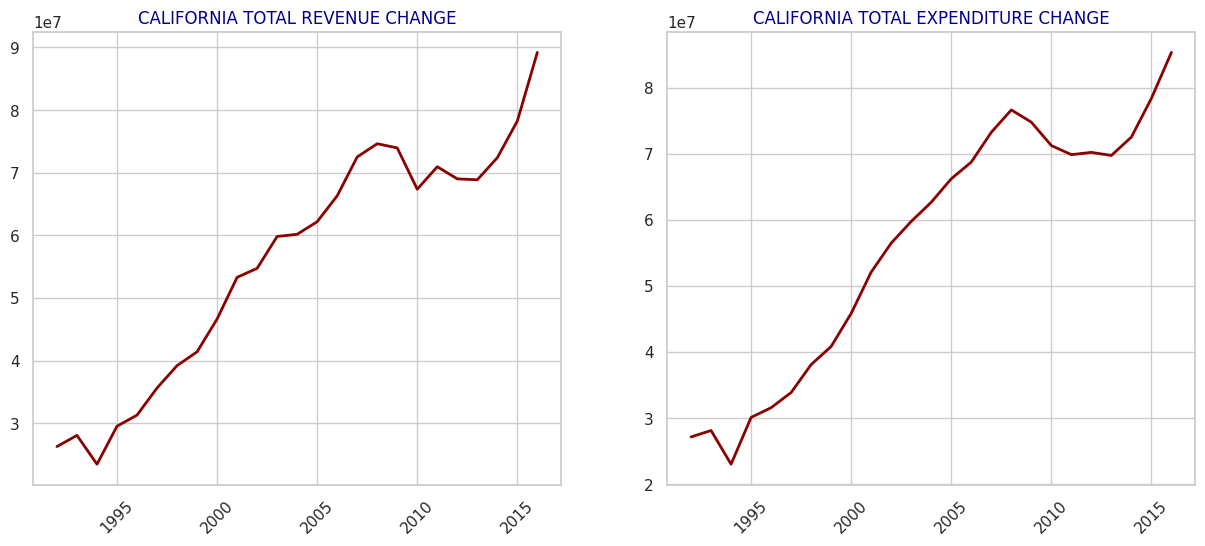

In [117]:
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(15,6)
title_style={'family':'Century Gothic','color':'darkred','size':20}
axis_style={'family':'Century Gothic','color':'darkblue','size':25}

x=education_stats[education_stats['STATE']=='CALIFORNIA']['YEAR']
y=education_stats[education_stats['STATE']=='CALIFORNIA']['TOTAL_REVENUE']
z=education_stats[education_stats['STATE']=='CALIFORNIA']['TOTAL_EXPENDITURE']

plt.subplot(1,2,1)
plt.title('CALIFORNIA TOTAL REVENUE CHANGE',color='darkblue')
plt.plot(x,y,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(1,2,2)
plt.title('CALIFORNIA TOTAL EXPENDITURE CHANGE',color='darkblue')
plt.plot(x,z,c='darkred',lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.show()


 - When we look at the graphs above, we see that these two data show very similar changes. When we evaluate it by years, we see a continuous increase. There seems to be a bottom in the data before 1995, and both data peaked in 2016.

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [118]:
my_average_math_score=education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_MATH_4_SCORE'].mean()+education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_MATH_8_SCORE'].mean()
my_average_reading_score=education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_READING_4_SCORE'].mean()+education_stats[education_stats['STATE']=='CALIFORNIA']['AVG_READING_8_SCORE'].mean()
print("Average math score = "+str(my_average_math_score))
print("Average reading score = "+str(my_average_reading_score))

Average math score = 495.66666666666663
Average reading score = 460.57575757575756


 - In the calculation I made without correcting the data above, we see that students in California are more successful in mathematics. But I think that in order to get a healthier result, it is necessary to complete the missing data, and I think I can do this in the two following questions.

**(4)** What is the distribution of mathematics and reading grades?

 - When we look at the distribution of mathematics and reading grades data, we see that students are generally successful in mathematics. but since there is too much missing information in these columns in the dataset, I think it is necessary to work with a better dataset for a correct result, or the dataset needs to be completed properly.

**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [119]:
#here I created 3 copies of the parts we want in the dataset. Thus, when I complete the deficiencies, it will be easier for me to compare.math_data_mean=education_stats[['STATE','YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']]
math_data_median=education_stats[['STATE','YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']]
math_data_interpolation=education_stats[['STATE','YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']]

reading_data_mean=education_stats[['STATE','YEAR','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]
reading_data_median=education_stats[['STATE','YEAR','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]
reading_data_interpolation=education_stats[['STATE','YEAR','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]

math_data_mean['AVG_MATH_4_SCORE'].fillna(math_data_mean['AVG_MATH_4_SCORE'].mean(),inplace=True)
math_data_mean['AVG_MATH_8_SCORE'].fillna(math_data_mean['AVG_MATH_8_SCORE'].mean(),inplace=True)
math_data_median['AVG_MATH_4_SCORE'].fillna(math_data_median['AVG_MATH_4_SCORE'].median(),inplace=True)
math_data_median['AVG_MATH_8_SCORE'].fillna(math_data_median['AVG_MATH_8_SCORE'].median(),inplace=True)
math_data_interpolation.AVG_MATH_4_SCORE.interpolate(method='linear',inplace=True)
math_data_interpolation.AVG_MATH_8_SCORE.interpolate(method='linear',inplace=True)

reading_data_mean['AVG_READING_4_SCORE'].fillna(reading_data_mean['AVG_READING_4_SCORE'].mean(),inplace=True)
reading_data_mean['AVG_READING_8_SCORE'].fillna(reading_data_mean['AVG_READING_8_SCORE'].mean(),inplace=True)
reading_data_median['AVG_READING_4_SCORE'].fillna(reading_data_median['AVG_READING_4_SCORE'].median(),inplace=True)
reading_data_median['AVG_READING_8_SCORE'].fillna(reading_data_median['AVG_READING_8_SCORE'].median(),inplace=True)
reading_data_interpolation.AVG_READING_4_SCORE.interpolate(inplace=True)
reading_data_interpolation.AVG_READING_8_SCORE.interpolate(inplace=True)


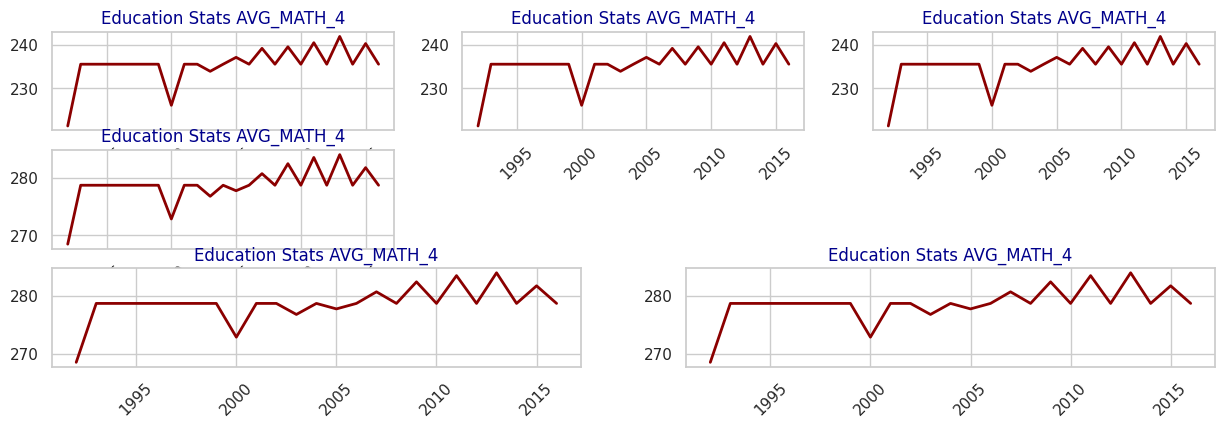

In [120]:
#What I want to compare here is actually the change over the years, so I wanted to take the average of each data over the years and compare them.
math_mean_4=[]
math_mean_8=[]
math_median_4=[]
math_median_8=[]
math_inter_4=[]
math_inter_8=[]

reading_mean_4=[]
reading_mean_8=[]
reading_median_4=[]
reading_median_8=[]
reading_inter_4=[]
reading_inter_8=[]

for year in education_stats.YEAR.unique():
  math_mean_4.append(math_data_mean[math_data_mean['YEAR']==year]['AVG_MATH_4_SCORE'].mean())
  math_mean_8.append(math_data_mean[math_data_mean['YEAR']==year]['AVG_MATH_8_SCORE'].mean())
  math_median_4.append(math_data_mean[math_data_median['YEAR']==year]['AVG_MATH_4_SCORE'].mean())
  math_median_8.append(math_data_mean[math_data_median['YEAR']==year]['AVG_MATH_8_SCORE'].mean())
  math_inter_4.append(math_data_mean[math_data_interpolation['YEAR']==year]['AVG_MATH_4_SCORE'].mean())
  math_inter_8.append(math_data_mean[math_data_interpolation['YEAR']==year]['AVG_MATH_8_SCORE'].mean())

  reading_mean_4.append(reading_data_mean[reading_data_mean['YEAR']==year]['AVG_READING_4_SCORE'].mean())
  reading_mean_8.append(reading_data_mean[reading_data_mean['YEAR']==year]['AVG_READING_8_SCORE'].mean())
  reading_median_4.append(reading_data_mean[reading_data_median['YEAR']==year]['AVG_READING_4_SCORE'].mean())
  reading_median_8.append(reading_data_mean[reading_data_median['YEAR']==year]['AVG_READING_8_SCORE'].mean())
  reading_inter_4.append(reading_data_mean[reading_data_interpolation['YEAR']==year]['AVG_READING_4_SCORE'].mean())
  reading_inter_8.append(reading_data_mean[reading_data_interpolation['YEAR']==year]['AVG_READING_8_SCORE'].mean())




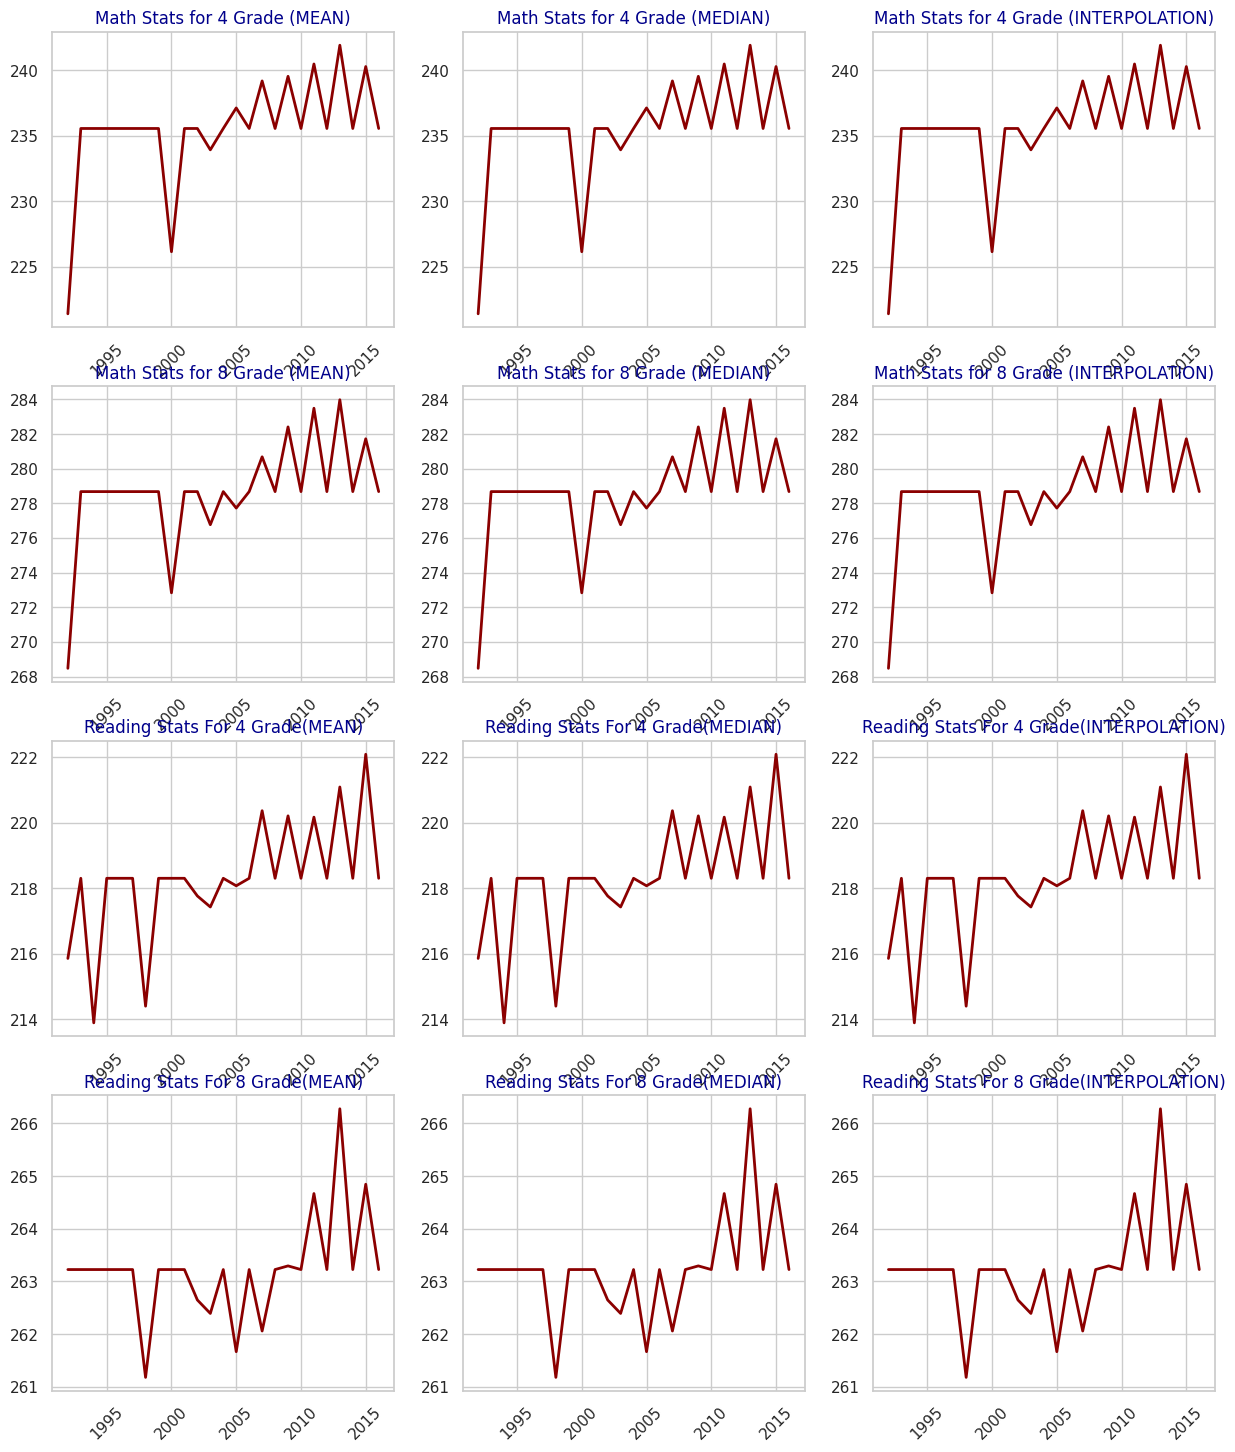

In [130]:
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(15,18)
title_style={'family':'Century Gothic','color':'darkred','size':20}
axis_style={'family':'Century Gothic','color':'darkblue','size':25}

plt.subplot(4,3,1)
plt.title('Math Stats for 4 Grade (MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_mean_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,2)
plt.title('Math Stats for 4 Grade (MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_median_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,3)
plt.title('Math Stats for 4 Grade (INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_inter_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,4)
plt.title('Math Stats for 8 Grade (MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_mean_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,5)
plt.title('Math Stats for 8 Grade (MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_median_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,6)
plt.title('Math Stats for 8 Grade (INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),math_inter_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,7)
plt.title('Reading Stats For 4 Grade(MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_mean_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,8)
plt.title('Reading Stats For 4 Grade(MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_median_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,9)
plt.title('Reading Stats For 4 Grade(INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_inter_4,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,10)
plt.title('Reading Stats For 8 Grade(MEAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_mean_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,11)
plt.title('Reading Stats For 8 Grade(MEDIAN)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_median_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)

plt.subplot(4,3,12)
plt.title('Reading Stats For 8 Grade(INTERPOLATION)',color='darkblue')
plt.plot(education_stats.YEAR.unique(),reading_inter_8,c="darkred",lw=2)
plt.xticks(rotation=45,fontsize=11)


plt.show()


- If we interpret the graphs above, it is seen that there is not much difference between using these 3 methods while completing the data for this dataset.